<center>

#  Прогнозирование заказов такси
    
</center>

__Описание проекта.__<br>
Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Необходимо построить модель для такого предсказания.

Значение метрики $RMSE$  на тестовой выборке должно быть не больше $48$.


- __Задача.__
  - Загрузить данные и выполнить их ресемплирование по одному часу.
  - Проанализировать данные.
  - Обучить разные модели с различными гиперпараметрами. <br>Сделать тестовую выборку размером $10\%$ от исходных данных.
  - Проверить данные на тестовой выборке и сделать выводы.
  

- __Данные.__
  - Местонахождение данных: https://code.s3.yandex.net/datasets/taxi.csv. 
  - Целевой признак - количество заказов находится в столбце `num_orders`.
  
<a name='tableofcontents'></a>

- __Содержание.__<br>
Общее время выполнения ноутбука в среде Практикума ≈ 41 мин.
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек." data-toc-modified-id="Импорт-библиотек.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек.</a></span></li><li><span><a href="#Установка-параметров-проекта." data-toc-modified-id="Установка-параметров-проекта.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Установка параметров проекта.</a></span></li><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Подготовка-и-анализ-данных." data-toc-modified-id="Подготовка-и-анализ-данных.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка и анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Вспомогательные-функции." data-toc-modified-id="Вспомогательные-функции.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вспомогательные функции.</a></span><ul class="toc-item"><li><span><a href="#Функция-вычисления-процента-аномальных-значений." data-toc-modified-id="Функция-вычисления-процента-аномальных-значений.-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Функция вычисления процента аномальных значений.</a></span></li><li><span><a href="#Функция-построения-графиков." data-toc-modified-id="Функция-построения-графиков.-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Функция построения графиков.</a></span></li><li><span><a href="#Функция-определения-стационарности-временного-ряда." data-toc-modified-id="Функция-определения-стационарности-временного-ряда.-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Функция определения стационарности временного ряда.</a></span></li><li><span><a href="#Функция-вывода-общей-информации." data-toc-modified-id="Функция-вывода-общей-информации.-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Функция вывода общей информации.</a></span></li></ul></li><li><span><a href="#Вывод-первичной-информации-о-данных." data-toc-modified-id="Вывод-первичной-информации-о-данных.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод первичной информации о данных.</a></span></li><li><span><a href="#Подготовка-и-анализ-данных.-Промежуточный-вывод." data-toc-modified-id="Подготовка-и-анализ-данных.-Промежуточный-вывод.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Подготовка и анализ данных. Промежуточный вывод.</a></span></li><li><span><a href="#Подготовка-и-анализ-данных." data-toc-modified-id="Подготовка-и-анализ-данных.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Подготовка и анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Оригинальный-временной-ряд." data-toc-modified-id="Оригинальный-временной-ряд.-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Оригинальный временной ряд.</a></span></li><li><span><a href="#Разность-оригинального-временного-ряда." data-toc-modified-id="Разность-оригинального-временного-ряда.-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Разность оригинального временного ряда.</a></span></li></ul></li><li><span><a href="#Анализ-данных.-Вывод." data-toc-modified-id="Анализ-данных.-Вывод.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ данных. Вывод.</a></span><ul class="toc-item"><li><span><a href="#Оригинальные-данные-после-ресемплинга." data-toc-modified-id="Оригинальные-данные-после-ресемплинга.-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Оригинальные данные после ресемплинга.</a></span></li><li><span><a href="#Разность-временного-ряда-после-ресемплинга." data-toc-modified-id="Разность-временного-ряда-после-ресемплинга.-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Разность временного ряда после ресемплинга.</a></span></li><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Вывод.</a></span></li></ul></li></ul></li><li><span><a href="#Создание-признаков." data-toc-modified-id="Создание-признаков.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Создание признаков.</a></span><ul class="toc-item"><li><span><a href="#Функция-создания-признаков." data-toc-modified-id="Функция-создания-признаков.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Функция создания признаков.</a></span></li><li><span><a href="#Создание-признаков." data-toc-modified-id="Создание-признаков.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Создание признаков.</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков.-Вывод." data-toc-modified-id="Создание-признаков.-Вывод.-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Создание признаков. Вывод.</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-и-предварительный-отбор-признаков." data-toc-modified-id="Анализ-и-предварительный-отбор-признаков.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Анализ и предварительный отбор признаков.</a></span><ul class="toc-item"><li><span><a href="#Корреляция-признаков,-мультиколлинеарность." data-toc-modified-id="Корреляция-признаков,-мультиколлинеарность.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Корреляция признаков, мультиколлинеарность.</a></span><ul class="toc-item"><li><span><a href="#Функция-вывода-информации-о-корреляции-признаков." data-toc-modified-id="Функция-вывода-информации-о-корреляции-признаков.-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Функция вывода информации о корреляции признаков.</a></span></li><li><span><a href="#Вывод-информации-о-корреляции-признаков." data-toc-modified-id="Вывод-информации-о-корреляции-признаков.-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Вывод информации о корреляции признаков.</a></span></li><li><span><a href="#Корреляция-признаков.-Вывод." data-toc-modified-id="Корреляция-признаков.-Вывод.-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Корреляция признаков. Вывод.</a></span></li></ul></li><li><span><a href="#Анализ-и-предварительный-отбор-признаков.-Вывод." data-toc-modified-id="Анализ-и-предварительный-отбор-признаков.-Вывод.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Анализ и предварительный отбор признаков. Вывод.</a></span></li></ul></li><li><span><a href="#Разделение-выборок." data-toc-modified-id="Разделение-выборок.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Разделение выборок.</a></span><ul class="toc-item"><li><span><a href="#Размер-тестовой-выборки." data-toc-modified-id="Размер-тестовой-выборки.-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Размер тестовой выборки.</a></span></li><li><span><a href="#Функция-разделения-выборок." data-toc-modified-id="Функция-разделения-выборок.-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Функция разделения выборок.</a></span></li><li><span><a href="#Разделение-выборок." data-toc-modified-id="Разделение-выборок.-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Разделение выборок.</a></span></li></ul></li><li><span><a href="#Обучение." data-toc-modified-id="Обучение.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Обучение.</a></span><ul class="toc-item"><li><span><a href="#Функция-отбора-признаков-и-подбора-гиперпараметров." data-toc-modified-id="Функция-отбора-признаков-и-подбора-гиперпараметров.-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Функция отбора признаков и подбора гиперпараметров.</a></span></li><li><span><a href="#Линейная-регрессия-LinearRegression." data-toc-modified-id="Линейная-регрессия-LinearRegression.-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Линейная регрессия <code>LinearRegression</code>.</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия-LinearRegression.-Вывод." data-toc-modified-id="Линейная-регрессия-LinearRegression.-Вывод.-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Линейная регрессия <code>LinearRegression</code>. Вывод.</a></span></li></ul></li><li><span><a href="#Дерево-решений-DecisionTreeRegressor." data-toc-modified-id="Дерево-решений-DecisionTreeRegressor.-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Дерево решений <code>DecisionTreeRegressor</code>.</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений-DecisionTreeRegressor.-Вывод." data-toc-modified-id="Дерево-решений-DecisionTreeRegressor.-Вывод.-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Дерево решений <code>DecisionTreeRegressor</code>. Вывод.</a></span></li></ul></li><li><span><a href="#Градиентный-бустинг-CatBoostRegressor." data-toc-modified-id="Градиентный-бустинг-CatBoostRegressor.-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Градиентный бустинг <code>CatBoostRegressor</code>.</a></span><ul class="toc-item"><li><span><a href="#Градиентный-бустинг-CatBoostRegressor.-Вывод." data-toc-modified-id="Градиентный-бустинг-CatBoostRegressor.-Вывод.-8.4.1"><span class="toc-item-num">8.4.1&nbsp;&nbsp;</span>Градиентный бустинг <code>CatBoostRegressor</code>. Вывод.</a></span></li></ul></li><li><span><a href="#Алгоритм-прогнозирования-Prophet." data-toc-modified-id="Алгоритм-прогнозирования-Prophet.-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Алгоритм прогнозирования <code>Prophet</code>.</a></span><ul class="toc-item"><li><span><a href="#Алгоритм-прогнозирования-Prophet.-Вывод." data-toc-modified-id="Алгоритм-прогнозирования-Prophet.-Вывод.-8.5.1"><span class="toc-item-num">8.5.1&nbsp;&nbsp;</span>Алгоритм прогнозирования <code>Prophet</code>. Вывод.</a></span></li></ul></li><li><span><a href="#Рекуррентная-нейронная-сеть-LSTM." data-toc-modified-id="Рекуррентная-нейронная-сеть-LSTM.-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Рекуррентная нейронная сеть <code>LSTM</code>.</a></span><ul class="toc-item"><li><span><a href="#Функция-подготовки-массивов." data-toc-modified-id="Функция-подготовки-массивов.-8.6.1"><span class="toc-item-num">8.6.1&nbsp;&nbsp;</span>Функция подготовки массивов.</a></span></li><li><span><a href="#Создание-класса-модели." data-toc-modified-id="Создание-класса-модели.-8.6.2"><span class="toc-item-num">8.6.2&nbsp;&nbsp;</span>Создание класса модели.</a></span></li><li><span><a href="#Функция-обучения-LSTM." data-toc-modified-id="Функция-обучения-LSTM.-8.6.3"><span class="toc-item-num">8.6.3&nbsp;&nbsp;</span>Функция обучения <code>LSTM</code>.</a></span></li><li><span><a href="#Рекуррентная-нейронная-сеть-LSTM.-Вывод." data-toc-modified-id="Рекуррентная-нейронная-сеть-LSTM.-Вывод.-8.6.4"><span class="toc-item-num">8.6.4&nbsp;&nbsp;</span>Рекуррентная нейронная сеть <code>LSTM</code>. Вывод.</a></span></li></ul></li><li><span><a href="#Обучение.-Вывод." data-toc-modified-id="Обучение.-Вывод.-8.7"><span class="toc-item-num">8.7&nbsp;&nbsp;</span>Обучение. Вывод.</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Оценка-адекватности." data-toc-modified-id="Оценка-адекватности.-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Оценка адекватности.</a></span></li><li><span><a href="#Тестирование.-Вывод." data-toc-modified-id="Тестирование.-Вывод.-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Тестирование. Вывод.</a></span></li></ul></li><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Вывод.</a></span><ul class="toc-item"><li><span><a href="#Итог-работы." data-toc-modified-id="Итог-работы.-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Итог работы.</a></span></li><li><span><a href="#Обзор-работы." data-toc-modified-id="Обзор-работы.-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Обзор работы.</a></span></li></ul></li></ul></div>

 ## Импорт библиотек.
 ---

[К содержанию.](#tableofcontents)

In [1]:
# perf_copunter для замеров времени.
from time import perf_counter
notebook_time_start = perf_counter()

## Работа с датафреймами.
import pandas as pd
## Визуализация.
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
## numpy для вычислений.
import numpy as np

## Работа с временными рядами.
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.sm_exceptions import InterpolationWarning
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Phi_K для вычисления корреляции признаков.
!pip install phik -q
import phik
from phik.report import plot_correlation_matrix

## Методы и классы для работы с моделями.
# Разделение и трансформация  выборок, подбор параметров.
from sklearn.model_selection import (train_test_split, 
                                     TimeSeriesSplit, 
                                     GridSearchCV)
# Класс для отбора признаков.
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
## Методы и классы для работы с пайплайнами.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Модели.
# Линейная регрессия.
from sklearn.linear_model import LinearRegression
# Дерево решений.
from sklearn.tree import DecisionTreeRegressor
# Алгоритмы градиентного бустинга.
# !pip install catboost -q
from catboost import CatBoostRegressor
# Алгоритм прогнозирования врем. рядов.
!pip install prophet -q
from prophet import Prophet
from prophet.utilities import regressor_coefficients as prohet_coeffs_
# Фреймворк torch для работы с нейросетями.
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as torch_data_
# Метрики.
from sklearn.metrics import mean_squared_error

## Дополнительные модули.
# tqdm для контроля выполнения ячеек;
from tqdm.notebook import tqdm
# os для обращения к среде разработки
import os
# Подавление вывода некоторых предупреждений.
import warnings
# Кастомизация вывода.
from IPython.display import display_html, HTML

## Установка параметров проекта.
---

[К содержанию.](#tableofcontents)

Зададим путь к датасету и другие параметры проекта.

In [2]:
# Установим путь к датасету.
DATA_PATH = '/datasets/'

# Установим начальное значение генератора псевдослучайных чисел.
SEED = 42
np.random.seed(SEED)

# Определим константы.
TARGET = 'num_orders'
HRS_IN_DAY = 24
DAYS_IN_WEEK = 7
TEST_RATIO = .1

# Установим стиль отображения заголовков таблиц.
styles = [
    dict(selector = 'caption',
         props = [('text-align', 'center'),
                  ('font-size', '130%'),
                  ('font-weight', 'bold'),
                  ('white-space', 'pre-wrap')]),
    dict(selector = 'th',
         props = [('max-width', '250px')])
    ]

# Установим параметры отображения рядов и столбцов таблиц.
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Установим параметры отображения графиков.
MPL_WIDTH = 15
MPL_HEIGHT = 5
rc('font', size = 14)
figure_kwargs = dict(figsize = (MPL_WIDTH, MPL_HEIGHT),
                     facecolor = 'white',
                     autolayout = True,
                     titlesize = 16)
plt.style.use('seaborn-darkgrid')
rc('figure', **figure_kwargs)

# Подавим вывод некоторых предупреждений.
warnings.simplefilter('ignore', InterpolationWarning)
warnings.simplefilter('ignore', FutureWarning)

# Зададим функцию вывода центрированного текста.
def print_c(text):
    display(HTML('<div style="text-align:center; font-weight:bold; '+
                 f'font-size:20px">{text}</div>'))

## Загрузка данных.

[К содержанию.](#tableofcontents)

---
- Загрузим данные.
- Выведем информацию и первые $5$ строк данных, чтобы убедиться, что данные содержат временной ряд в верном формате.

In [3]:
try:
    df = pd.read_csv(DATA_PATH + 'taxi.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv')
    
# Выведем информацию о данных.
print('\033[1m- Информация о датайфрейме:\033[0m')
display(df.info())
print('\033[1m- Кол-во дубликатов в данных: '+
      f'{df.datetime.duplicated().sum()}')
# Выведем первые 5 строк датафрейма.
print('\n\033[1m- Первые 5 строк датафрейма:\033[0m')
df.head()

- Информация о датайфрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


None

- Кол-во дубликатов в данных: 0

- Первые 5 строк датафрейма:


datetime  num_orders
0  2018-03-01 00:00:00           9
1  2018-03-01 00:10:00          14
2  2018-03-01 00:20:00          28
3  2018-03-01 00:30:00          20
4  2018-03-01 00:40:00          32

- Заменим индекс признаком `datetime` для дальнейшей работы.<br>
- Проверим результат.

In [4]:
# Заменим индекс.
df.set_index(df.datetime, inplace = True)
df.drop(['datetime'], axis = 1, inplace = True)
df.index = pd.to_datetime(df.index)
# Выведем первые 5 строк датафрейма и название нового индекса.
print('\n\033[1m- Первые 5 строк датафрейма:\033[0m')
display(df.head())
print(f'\033[1m- Название нового индекса:\033[0m {df.index.name}')
print(f'\033[1m- Тип нового индекса:\033[0m {df.index.dtype}')


- Первые 5 строк датафрейма:


num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32

- Название нового индекса: datetime
- Тип нового индекса: datetime64[ns]


## Подготовка и анализ данных.

[К содержанию.](#tableofcontents)

---
- Создадим вспомогательные функции.
- Выведем первичную информацию о данных.
- Произведём декомпозицию временного ряда.
- Предобработаем и дополним данные новыми признаками.
- Проанализируем данные.

### Вспомогательные функции.

[К содержанию.](#tableofcontents)

---
- Создадим функции
  - функцию вычисления процента аномальных значений;
  - функцию построения графиков;
  - функцию проверки стационарности;
  - функция вывода общей информации.

#### Функция вычисления процента аномальных значений.

- Введём функцию расчёта и вывода процентов аномальных значений для отобранных признаков.

In [5]:
# Функция рассчёта и вывода процентов выбросов для отобранных
# признаков.
def get_outliers_ratio(data : 'pd.Series | pd.DataFrame',
                       col : str = None,
                       whiskers : bool = False):

    # Запишем признак/столбец в переменную.
    col = data[col] if col else data
    # Вычислим интерквартильный размах.
    distr_iqr = col.quantile(.75) - col.quantile(.25)
    # Вычислим усы диаграммы размаха или 2.7 сигмы.
    whisker_upp = col.quantile(.75) + 1.5 * distr_iqr
    whisker_low = col.quantile(.25) - 1.5 * distr_iqr
    # Если усы превышают экстремумы, приравняем их.
    if whisker_upp >= col.max():
        whisker_upp = col.max()
    if whisker_low <= col.min():
        whisker_low = col.min()
    else:
        pass
    # Вычислим процент выбросов.
    outliers_ratio = (
        (col[col > whisker_upp].count() +
         col[col < whisker_low].count()) /
        len(col)
        )
    # Выведем усы и процент выбросов если необходимо.
    if whiskers:
        return whisker_low, whisker_upp, outliers_ratio
    # Выведем только процент выбросов.
    else:
        return outliers_ratio

#### Функция построения графиков.

Определим функцию построения графиков, которая
- примет на вход:
  - данные;
  - дополнительные описания к графикам;
  - метку наложения или продолжения графика;
  - метку вывода коррелограмм;
- выведет:
  - гистограммы или линейные графики на совмещённых или раздельных осях;
  - при установке метки вывода коррелограмм, выведет график(и) автокорреляции и/или частичной автокорреляции.

In [6]:
# Функция построения графиков.
def ts_plot(data : 'pd.Series | pd.DataFrame', 
            data_add : 'pd.Series | pd.DataFrame' = None,
            target : str = None,
            suptitle : str = 'Распределение заказов по времени.', 
            suptitle_add : str = '', 
            title : str = '', 
            title_add : str = '', 
            xlabel : str = 'Дата.',
            ylabel : str = 'Количество.', 
            label_add : str = '', 
            legend : str = 'Заказы.',
            legend_title : str = '',
            overlay : bool = False,
            fill_between : dict = None,
            violin : bool = False, 
            ac_plot : list['statsmodels plotting fns'] = None, 
            lags : int = None,
            **kwargs) -> None:
    
    if not ac_plot:
        # Преобразование типов при необходимости.
        data = data.to_frame() if type(data) == pd.Series else data

        # Несколько кривых на одном графике.
        if overlay or data_add is not None or fill_between is not None:
            if overlay:
                data.plot(**kwargs)
            elif data_add is not None:
                if not isinstance(data_add, list):
                    data_add = [data_add]
                ax = data.plot(**kwargs)
                for i in range(len(data_add)):
                    data_add[i].plot(ax=ax)
            elif fill_between is not None:
                fig, ax = plt.subplots()
                data.plot(ax = ax, **kwargs)
                ax.fill_between(**fill_between)
                
            plt.title(suptitle + suptitle_add if len(title) == 0 
                      else title)
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.legend(legend).set_title(legend_title)
            plt.show();
            
        # Несколько графиков.
        else:
            fig = plt.figure(
                figsize = (MPL_WIDTH,
                           (data.shape[1] * MPL_HEIGHT +\
                            data.shape[1] * MPL_HEIGHT * violin))
            )
            fig.suptitle(suptitle + suptitle_add, x = .52)
            gs = fig.add_gridspec(data.shape[1] + violin, 1)
            for i in range(data.shape[1]):
                ax = fig.add_subplot(gs[i])
                data.iloc[:, i].plot(**kwargs)
                ax.set_title(title if isinstance(title, str) 
                             else title[i])
                ax.set_xlabel(xlabel if isinstance(xlabel, str) 
                              else xlabel[i])
                ax.set_ylabel(ylabel if isinstance(ylabel, str) 
                              else ylabel[i])
                ax.legend([legend] if isinstance(ylabel, str) 
                          else legend[i]).set_title(legend_title)
                # Построим скрипичную диаграмму при необходимости.
                if violin:
                    ax1 = fig.add_subplot(gs[i + violin], sharex = ax)
                    sns.violinplot(data.iloc[:, i], orientation='h')
                    ax1.set_title(title if isinstance(title, str) 
                                 else title[i])
                    ax1.set_xlabel(xlabel if isinstance(xlabel, str) 
                                  else xlabel[i])
            plt.show();
           
    # Выведем коррелограммы.
    else:
        # Приведём типы переменных.
        for var in [ac_plot, lags, title_add, label_add]:
            if not isinstance(var, list):
                var = [var] 
        # Объявим константу кол-ва часов в сутках.    
        HOURS_IN_DAY = 24
        # Построим графики.
        fig = plt.figure(figsize = (MPL_WIDTH, 
                                    len(lags) * MPL_HEIGHT))
        fig.suptitle('Коррелограммы.', x = .52, y = 1.0)
        gs = fig.add_gridspec(len(lags), 1)
        fig.text(0.0, 0.5, 'Коеффициент корреляции.', va='center', 
                 rotation='vertical')

        for i, (num_lags, plot) in enumerate(zip(lags, ac_plot)):
            ax = fig.add_subplot(gs[i])
            plot(data[target], 
                 ax = ax, 
                 lags = num_lags, 
                 title = ('Автокорреляция.' + title_add[i]))
            ax.set_xlabel(f'Отставание{label_add[i]}.')     
            if lags[i] < 1000:
                ax.set_xticks(
                    np.arange(0, 
                              num_lags + 1, 
                              HRS_IN_DAY, 
                              dtype = 'int')
                )
                ax.set_xticklabels(
                    np.arange(0, 
                              num_lags / HRS_IN_DAY + 1, 
                              1, 
                              dtype = 'int')
                )
        plt.show();

#### Функция определения стационарности временного ряда.

Введём функцию определения стационарности ряда с помощью двух тестов из библиотеки `statsmodels`: 
- расширенного теста Дика-Фуллера (`adfuller`):<br>
  - нулевая гипотеза: временной ряд имеет единичный корень, не стационарен;
  - $p-value >$ уровня значимости $(0.05)$: ряд нестационарен;
  - $p-value <=$ уровня значимости $(0.05)$: ряд стационарен;
- теста Квятковского-Филлипса-Шмидта-Шина (`kpss`):<br>
  - нулевая гипотеза: временной ряд не имеет единичного корня, стационарен;
  - $p-value <=$ уровня значимости $(0.05)$: ряд не стационарен;
  - $p-value >$ уровня значимости $(0.05)$: ряд стационарен.

Выводы по результатам тестов сделаем в соответствии с <a target='_blank' href='https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html'>документацией</a>:
- Оба теста показывают стационарность: ряд стационарен.
- Оба теста показывают нестационарность: ряд не стационарен.
- Тест `adfuller` показывает стационарность, а `kpss` - нестационарность: ряд разностно-стационарен .
- Тест `adfuller` показывает нестационарность, а `kpss` - стационарность: ряд стационарен относительно детерминированного тренда.

In [7]:
# Определим тест на стационарность ряда.
def stationarity_test(data : pd.DataFrame) -> str:
    adf_res = adfuller(data, regression = 'ctt')[1]
    kpss_res = kpss(data, regression = 'ct')[1]
    
    if adf_res <= .05 and kpss_res > .05:
        return ('Временной ряд стационарен.')
    elif adf_res > .05 and kpss_res <= .05:
        return ('Временной ряд нестационарен.')
    elif adf_res > .05 and kpss_res > .05:
        return ('Временной ряд стационарен относительно '+
              'детерминированного тренда.')
    elif adf_res <= .05 and kpss_res <= .05:
        return ('Временной ряд разностно-стационарен.')
    else:
        return ('Ошибка. Проверьте данные.')

#### Функция вывода общей информации.
Создадим функцию, которая
- примет датафрейм и целевой признак;
- выведет
  - информацию и первые строки датафрейма;
  - кол-во явных дубликатов, 
  - кол-во уникальных значений целевого признака;
  - рез-тат тестов стационарности временного ряда;
  - рез-тат проверки монотонности дат;
  - распределение значений признака.

In [8]:
# Функция вывода общей информации.
def get_eda_info(data : 'pd.Series | pd.DataFrame', 
                 data_add : pd.DataFrame = None,
                 target : str = TARGET,
                 caption : str = 'Данные по заказам такси.',
                 describe : bool = True,
                 info : bool = True,
                 head : int = 20,
                 **kwargs) -> None:
    # Выведем первые строки датафрейма.
    display(data
            .head(head)
            .style
            .set_caption(f'{caption}\nПервые {head} наблюдений.')
            .set_table_styles(styles))
    print('\n', '~' * 70, '\n')

    # Выведем  рез-таты тестов на стационарность и монотонность.
    print(f'\033[1m- {stationarity_test(data[target])}\033[0m')
    monotonic_check = 'не ' if not data.index.is_monotonic else ''
    print(f'\033[1m- Даты указаны {monotonic_check}хронологически.\033[0m')

    # Выведем информацию о данных.
    print('\033[1m- Кол-во дубликатов дат: '+
          f'{data.index.duplicated().sum()}')
    print('\033[1m- Уникальных значений целевого признака:\033[0m',
         data.nunique()[0])
    print('\033[1m- Нулевых значений целевого признака:\033[0m',
         data[data[target] == 0].count()[0])
    if info:
        print('\033[1m- Информация о датайфрейме:\033[0m')
        display(data.info())
    else:
        print(f'\033[1m- Размер датайфрейма: {data.shape}\033[0m')
        if data_add is not None:
            dropped = data_add.shape[0] -  data.shape[0]
            print(f'\033[1m- Удалено наблюдений {dropped} или '+
                  f'{dropped / data.shape[0]:.2%} .\033[0m')
       
    print('\n', '~' * 70, '\n')

    if describe:
        # Выведем распределение признака.
        display(data
                .describe([.01, .05, .25, .5, .75, .85, .95, .99])
                .T
                .style
                .set_caption('Распределение целевого признака.')
                .set_table_styles(styles))
    
    
    # Выведем кол-во наблюдений по месяцам.
    if data_add is not None:
        fig, ax = plt.subplots(1, 1, 
                               figsize = (MPL_WIDTH, MPL_HEIGHT * 1.3))
        months_compare = pd.DataFrame()
        months_compare['data'] = (
            data.index.month.value_counts().sort_index()
        )
        months_compare['data_add'] = (
            data_add.index.month.value_counts().sort_index()
        )
        months_compare.index = data.index.month.unique()
        months_compare.plot.bar(rot = 0, ax = ax)
        ax.set_title('Распределение кол-в наблюдений по месяцам.', y = 1.1)
        ax.legend(['Результирующий датафрейм.', 'Оригинальный датафрейм.'], 
                  loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
    else:
        fig, ax = plt.subplots(1, 1)
        data.index.month.value_counts().sort_index().plot.bar(rot = 0, 
                                                              ax = ax)
        ax.set_title('Распределение кол-в наблюдений по месяцам.')
    ax.set_xlabel('Номер месяца.')
    ax.set_ylabel('Количество наблюдений.')
    plt.show();

### Вывод первичной информации о данных.

[К содержанию.](#tableofcontents)

---
- Вызовем функцию и выведем информацию о данных.
- Выведем гистограмму и скрипичную диаграмму.


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

- Временной ряд разностно-стационарен.
- Даты указаны хронологически.
- Кол-во дубликатов дат: 0
- Уникальных значений целевого признака: 81
- Нулевых значений целевого признака: 537
- Информация о датайфрейме:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



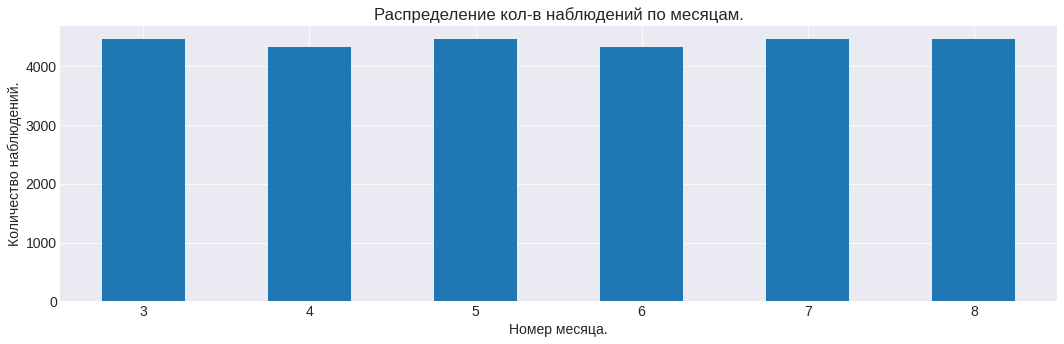

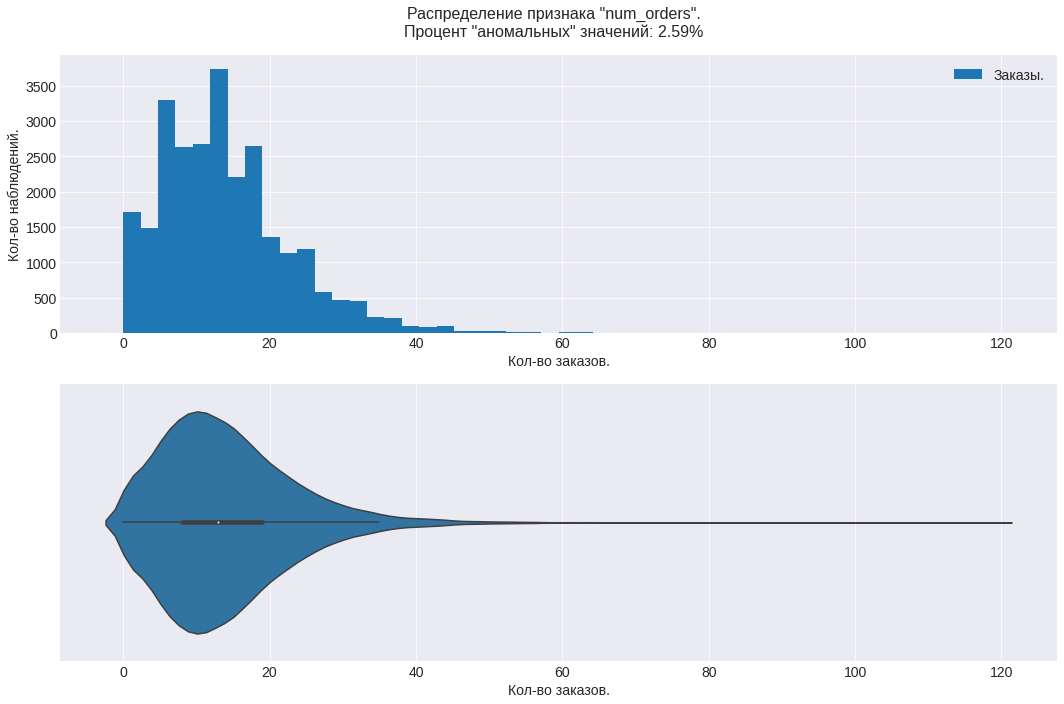

In [9]:
print_c('Оригинальный временной ряд.')

get_eda_info(data = df, target = TARGET)

# Выведем гистограмму и скрип. диаграмму.
ts_plot(df[TARGET],
        suptitle = ('Распределение признака "num_orders".'+
                    '\nПроцент "аномальных" значений: '+
                    f'{get_outliers_ratio(df[TARGET]):.2%}'),
        xlabel = 'Кол-во заказов.',
        ylabel = 'Кол-во наблюдений.',
        violin = True,
        kind = 'hist', bins = 50)

### Подготовка и анализ данных. Промежуточный вывод.

[К содержанию.](#tableofcontents)

---
- __Исходные данные. Общая информация.__
  - Данные представлены $26496$ наблюдениями и двумя признаками, один из которых - дата-время `datetime` - преобразован в индекс датафрейма, а второй - кол-во заказов `num_orders` - является целевым.
    - Данные содержат наблюдения за $6$ месяцев.
    - Периодичность наблюдений - $10 мин.$
    - Начало наблюдений: $00:00$ $1$ марта $2018$.
    - Конец наблюдений: $23:50$ $31$ августа $2018$.
    - Кол-во наблюдений распределено по месяцам равномерно с учётом кол-в дней в месяцах
  - Пропусков и дубликатов в данных не обнаружено.
  - В данных присутствуют выбросы: $ \approx 1\%$ высоких значений кол-в заказов более $43$.
  - Временной ряд является монотонным: возрастающим.
    
  - Временной ряд является одномерным, интегрированным.<br>
    - Т.к. тест `adfuller` показал стационарность, а тест `kpss` - нестационарность, временной ряд разностно-стационарен или интегрирован.
    - Необходимо взятие разности временного ряда для анализа (частичной) авторегрессии.
  - Данные распределены ненормально, что является дополнительным индикатором нестационарности временного ряда.

### Подготовка и анализ данных.

[К содержанию.](#tableofcontents)

---
#### Оригинальный временной ряд.
<a name='resample'></a>
  - __Ресемплируем данные по одному часу.__
  - Проведём декомпозицию.
  - Выведем для результирующего ряда
    - общую информацию о данных после ресемплинга;
    - общий график со скользящими средним и стандартным отклонением;
    - гистограмму и скрипичную диаграмму для доп. оценки;
    - графики тренда, тренда по месяцам, дням месяца и недели, и график сглаженного тренда;
    - графики сезонности и сезонности за неделю;
    - график остатков декомпозиции, шума.<br><br>
    
#### Разность оригинального временного ряда.
  - __Ресемплируем данные по одному часу.__
  - Возьмём разность временного ряда и проведём его декомпозицию для анализа автокорреляции, в т.ч., дополнительного анализа сезонности.
  - Выведем для разности результирующего временного ряда
    - общий график со скользящими средним и стандартным отклонением;
    - гистограмму и скрипичную диаграмму для доп. оценки;
    - результат декомпозиции;
    - графики авторегрессии и частичной авторегрессии.<br><br>
    
- Очистим датафреймы от временных столбцов.


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

- Временной ряд разностно-стационарен.
- Даты указаны хронологически.
- Кол-во дубликатов дат: 0
- Уникальных значений целевого признака: 251
- Нулевых значений целевого признака: 1
- Информация о датайфрейме:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


None


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



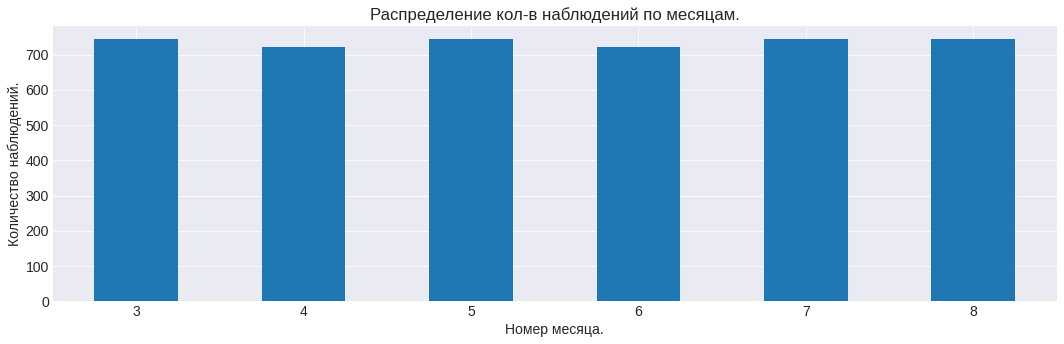

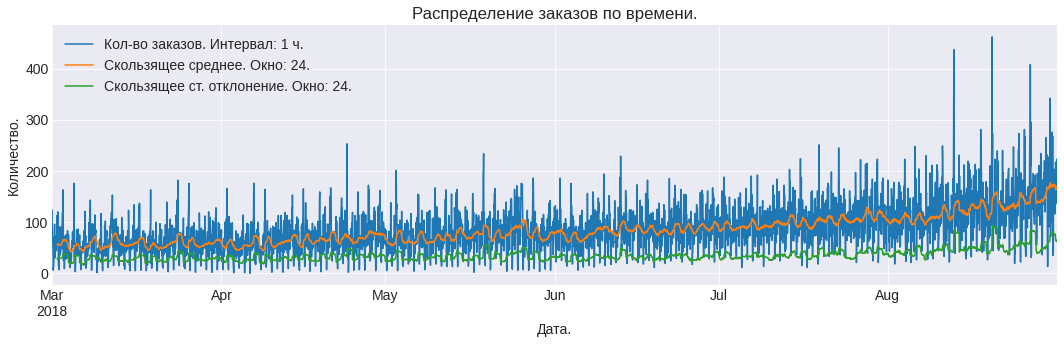

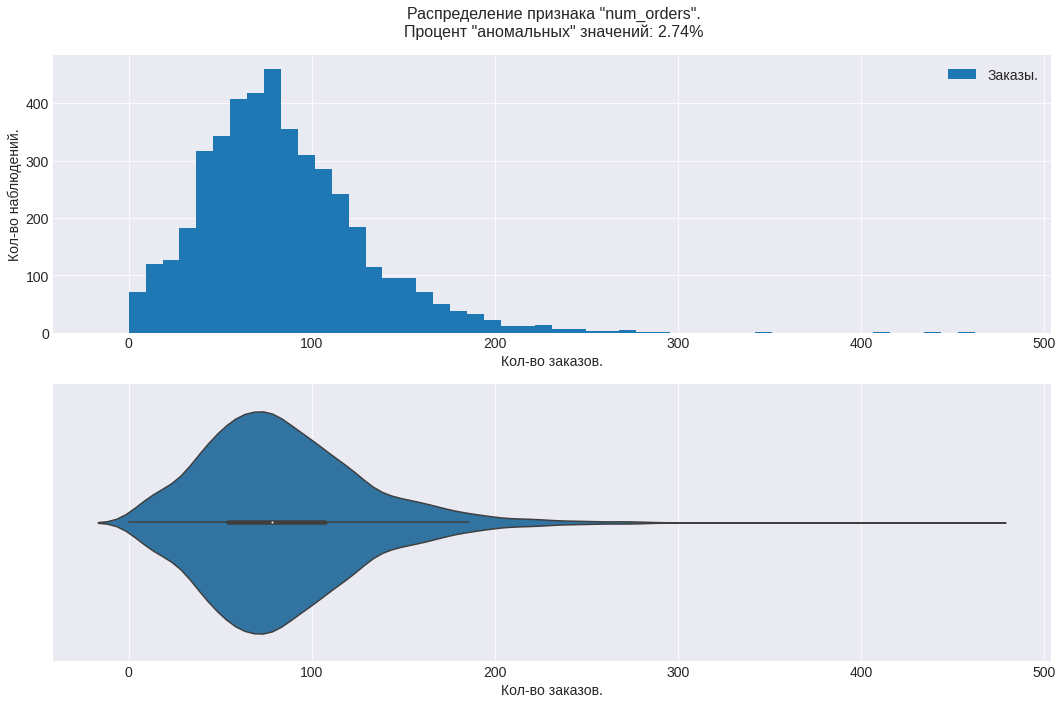

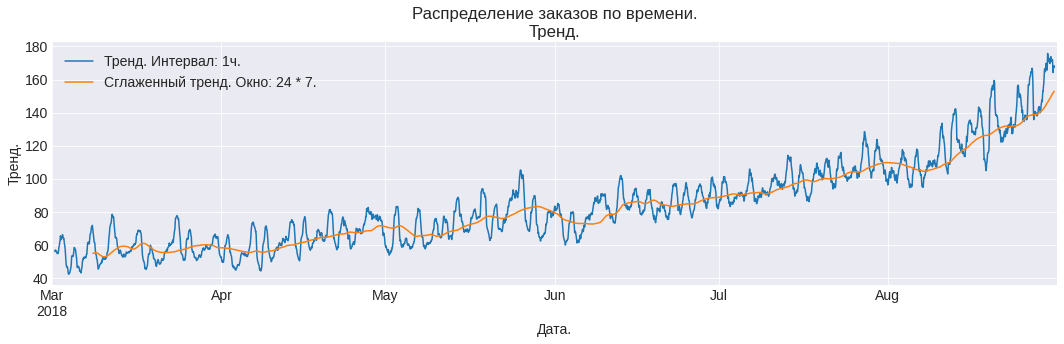

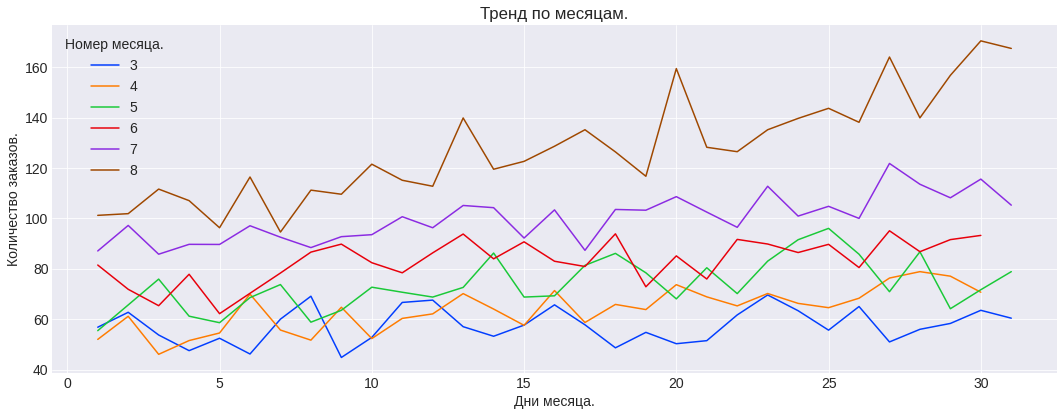

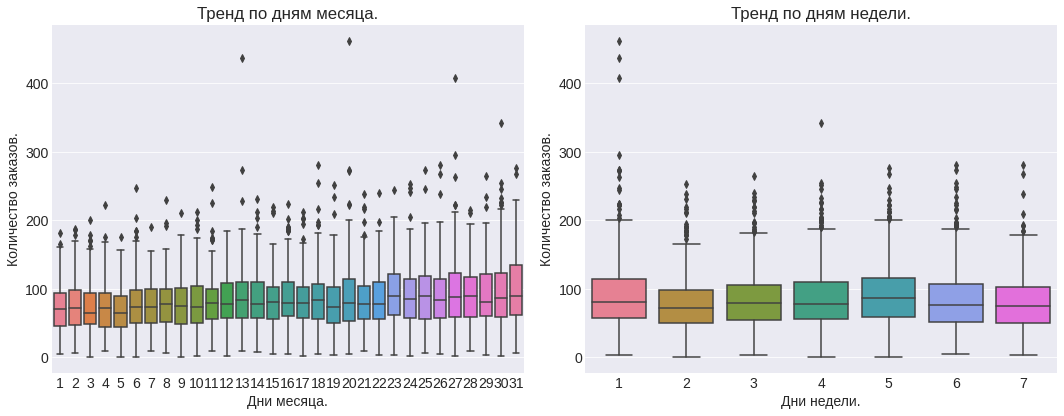

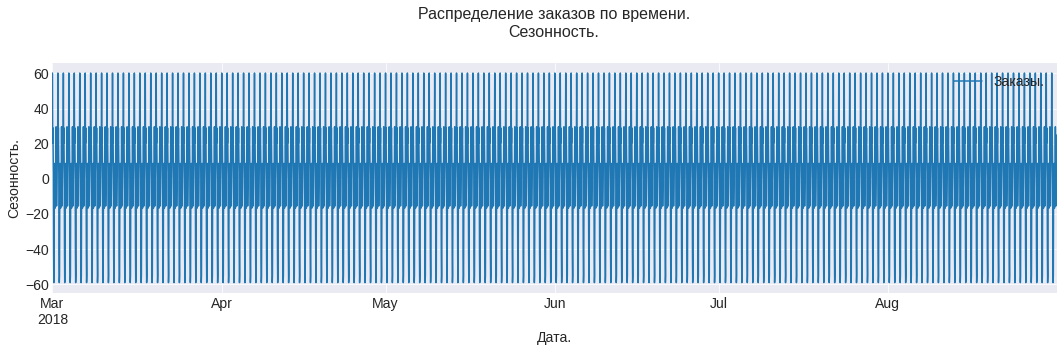

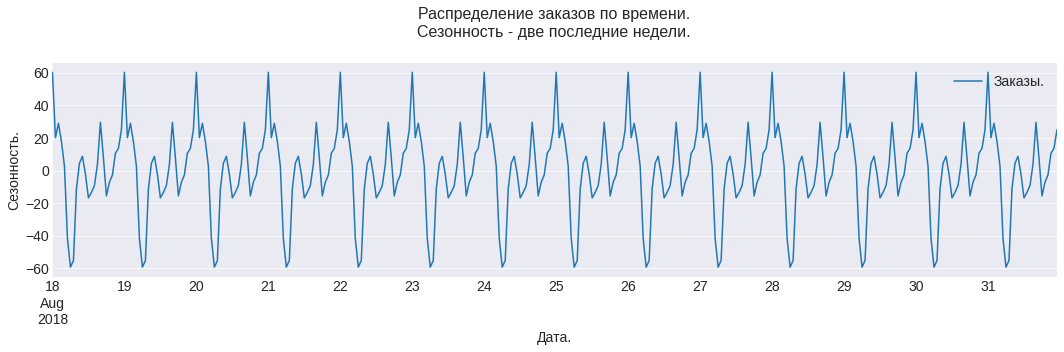

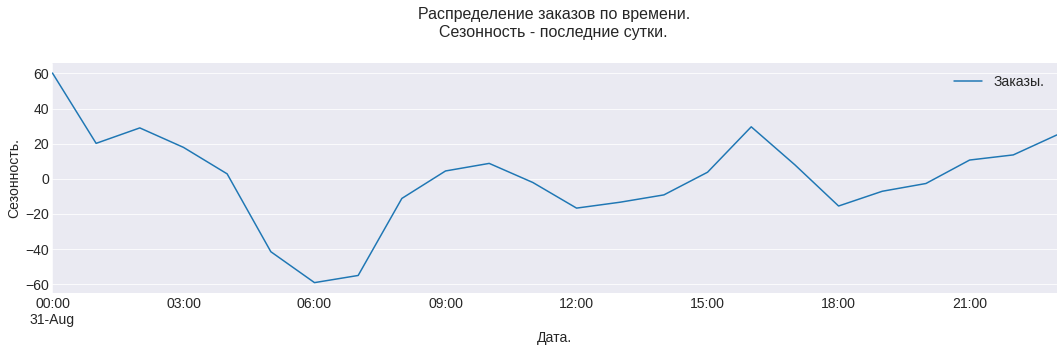

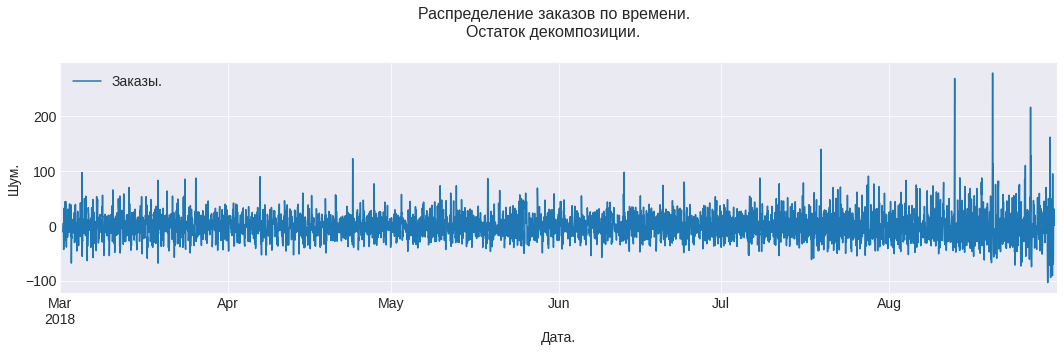

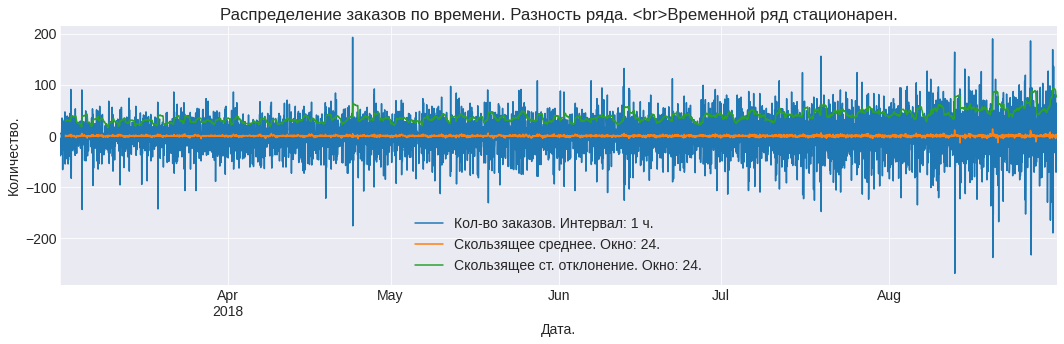

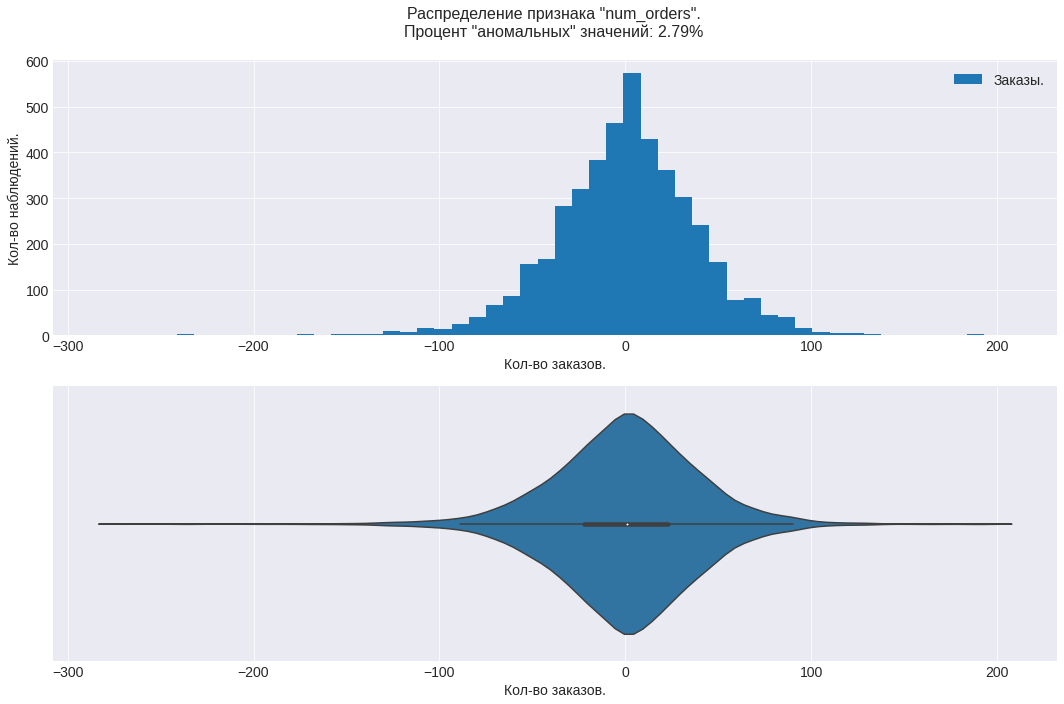

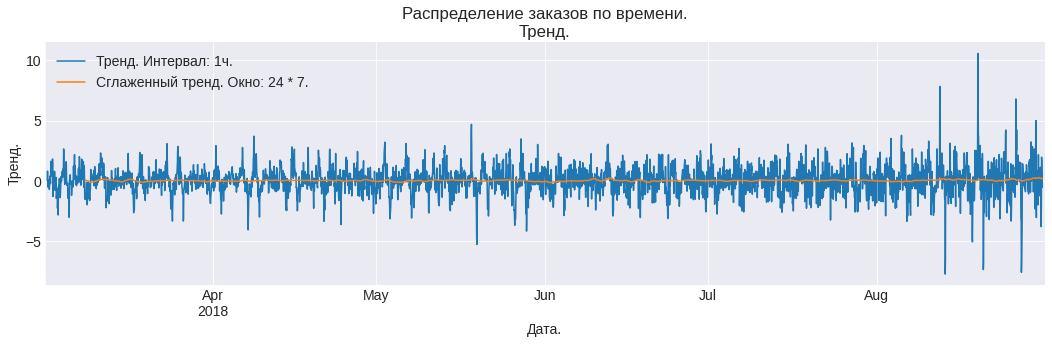

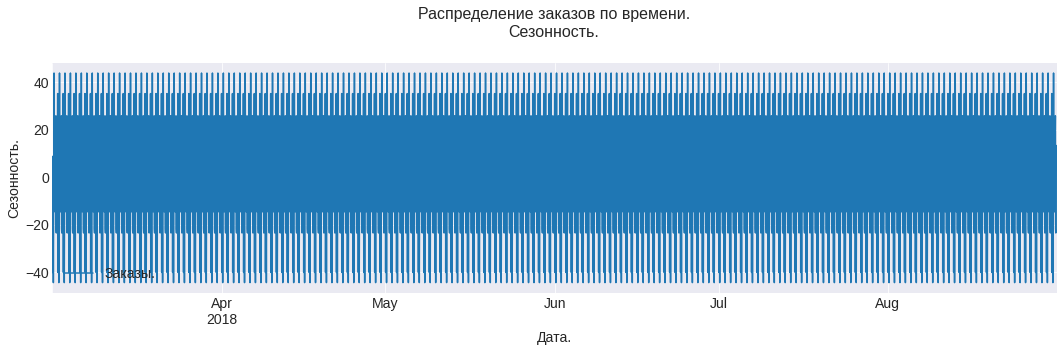

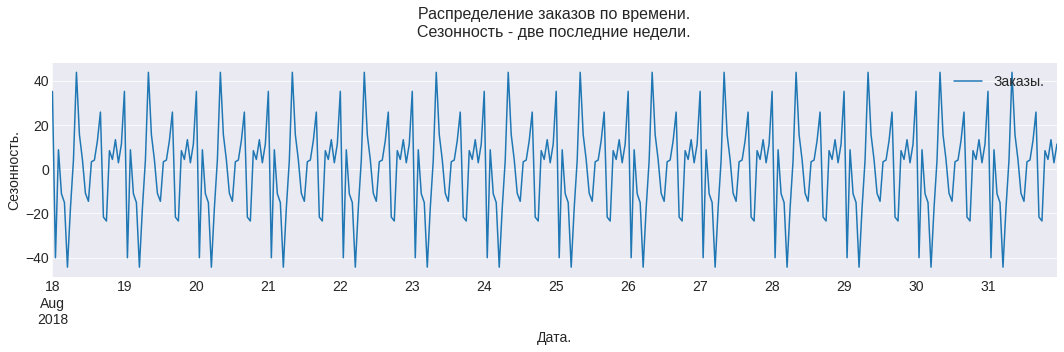

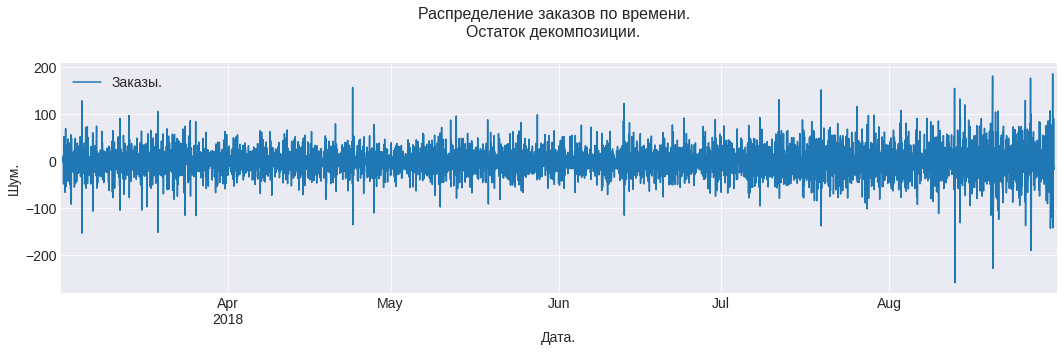

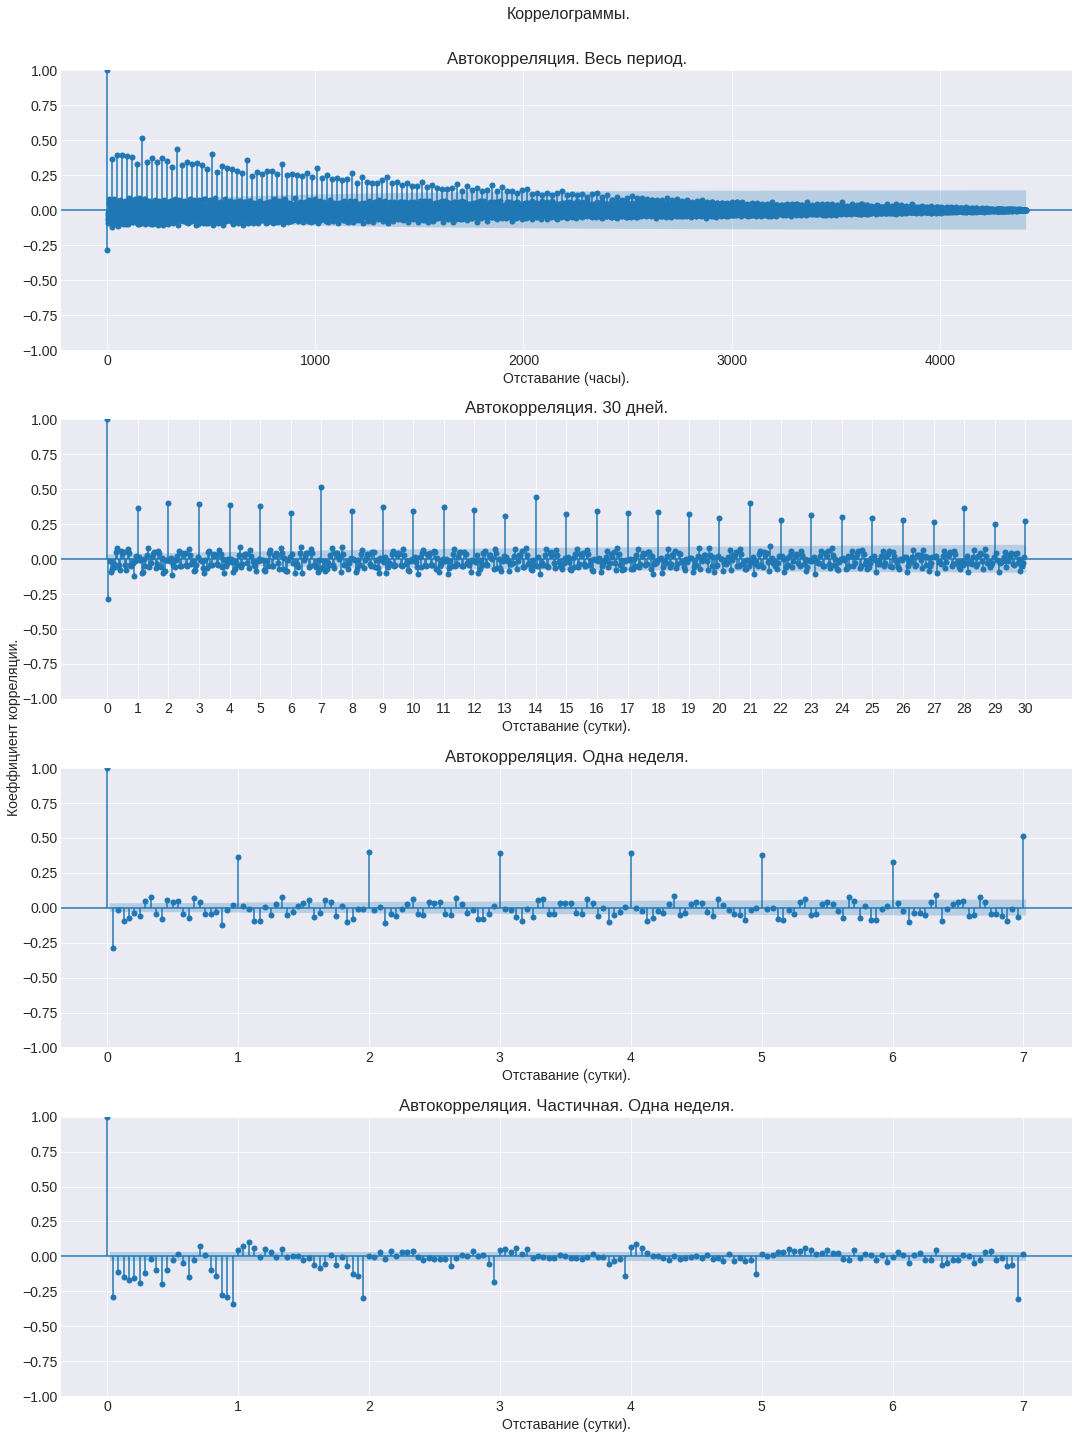

In [10]:
## Зададим окно сглаживания в неделю.
ROLL_WINDOW = HRS_IN_DAY * DAYS_IN_WEEK

## Оригинальный временной ряд.
print_c('Оригинальный временной ряд после ресемплинга.')
# Ресемплируем и декомпозируем данные.
df = df.resample('1H').sum() #------------------------- РЕСЕМПЛИНГ
decomposed = seasonal_decompose(df[TARGET])

# Выведем общую информацию после ресемплинга.
get_eda_info(data = df, target = 'num_orders', head = 10)

# Соберём и выведем данные общего графика.
df['mean'] = df[TARGET].rolling(HRS_IN_DAY).mean()
df['std'] = df[TARGET].rolling(HRS_IN_DAY).std()
legend_main = ['Кол-во заказов. Интервал: 1 ч.', 
               f'Скользящее среднее. Окно: {HRS_IN_DAY}.', 
               f'Скользящее ст. отклонение. Окно: {HRS_IN_DAY}.']
ts_plot(df[['num_orders', 'mean', 'std']],
        legend = legend_main, 
        overlay = True)

# Выведем гистограмму.
ts_plot(df[TARGET], 
        suptitle = ('Распределение признака "num_orders".'+
                    '\nПроцент "аномальных" значений: '+
                    f'{get_outliers_ratio(df[TARGET]):.2%}'),
        xlabel = 'Кол-во заказов.',
        ylabel = 'Кол-во наблюдений.',
        violin = True,
        kind = 'hist', bins = 50)

# Соберёми и выведем данные тренда.
df['trend'] = decomposed.trend
df['trend_smooth'] = decomposed.trend.rolling(ROLL_WINDOW).mean()
legend_trend = ['Тренд. Интервал: 1ч.', 
                f'Сглаженный тренд. Окно: {HRS_IN_DAY} * {DAYS_IN_WEEK}.']
ts_plot(df[['trend', 'trend_smooth']], 
        suptitle_add = '\nТренд.',
        ylabel = 'Тренд.',
        legend = legend_trend, 
        overlay = True)

# Создадим дополнительные графики тренда.
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df.index.day, df[TARGET], hue=df.index.month, 
             ci=None, palette='bright')
ax.legend(title = 'Номер месяца.')
ax.set_title('Тренд по месяцам.')
ax.set_xlabel('Дни месяца.')
ax.set_ylabel('Количество заказов.')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.boxplot(df.index.day, df.num_orders, 
            palette='husl', ax=ax[0])
ax[0].set_title('Тренд по дням месяца.')
ax[0].set_xlabel('Дни месяца.')
ax[0].set_ylabel('Количество заказов.')
sns.boxplot(df.index.weekday, df.num_orders, 
            palette='husl', ax=ax[1])
ax[1].set_title('Тренд по дням недели.')
ax[1].set_xlabel('Дни недели.')
ax[1].set_ylabel('Количество заказов.')
ax[1].set_xticklabels(range(1, 8))
plt.show();

# Выведем графики сезонности и остатков.
ts_plot(decomposed.seasonal,
        suptitle_add = '\nСезонность.',
        ylabel = 'Сезонность.')
ts_plot(decomposed.seasonal.tail(ROLL_WINDOW * 2), 
        suptitle_add = '\nСезонность - две последние недели.',
        ylabel = 'Сезонность.')
ts_plot(decomposed.seasonal.tail(HRS_IN_DAY), 
        suptitle_add = '\nСезонность - последние сутки.',
        ylabel = 'Сезонность.')
ts_plot(decomposed.resid, suptitle_add = '\nОстаток декомпозиции.',
        ylabel = 'Шум.')


## Разность временного ряда.
print('\n\n')
print_c('Разность временного ряда после ресемплинга.')
# Ресемплируем, возмём разность и декомпозируем данные.
df_diff = df.resample('1H').sum() #------------------------- РЕСЕМПЛИНГ
df_diff = df_diff.diff().dropna()
decomposed_diff = seasonal_decompose(df_diff[TARGET])

# Соберём и выведем данные общего графика.
df_diff['mean'] = df_diff[TARGET].rolling(HRS_IN_DAY).mean()
df_diff['std'] = df_diff[TARGET].rolling(HRS_IN_DAY).std()
legend_main = ['Кол-во заказов. Интервал: 1 ч.', 
               f'Скользящее среднее. Окно: {HRS_IN_DAY}.', 
               f'Скользящее ст. отклонение. Окно: {HRS_IN_DAY}.']
ts_plot(df_diff[['num_orders', 'mean', 'std']],
        suptitle_add = (' Разность ряда. '+
                        f'<br>{stationarity_test(df_diff.num_orders)}'),
        legend = legend_main, 
        overlay = True)

# Выведем гистограмму.
ts_plot(df_diff[TARGET], 
        suptitle = ('Распределение признака "num_orders".'+
                    '\nПроцент "аномальных" значений: '+
                    f'{get_outliers_ratio(df_diff[TARGET]):.2%}'),
        xlabel = 'Кол-во заказов.',
        ylabel = 'Кол-во наблюдений.',
        violin = True,
        kind = 'hist', bins = 50)

# Выведем результат декомпозиции.
# Соберёми и выведем данные тренда.
df_diff['trend'] = decomposed_diff.trend
df_diff['trend_smooth'] = decomposed_diff.trend.rolling(ROLL_WINDOW).mean()
legend_trend = ['Тренд. Интервал: 1ч.', 
                f'Сглаженный тренд. Окно: {HRS_IN_DAY} * {DAYS_IN_WEEK}.']
ts_plot(df_diff[['trend', 'trend_smooth']], 
        suptitle_add = '\nТренд.',
        ylabel = 'Тренд.',
        legend = legend_trend, 
        overlay = True)
# Выведем графики сезонности и остатков.
ts_plot(decomposed_diff.seasonal,
        suptitle_add = '\nСезонность.',
        ylabel = 'Сезонность.')
ts_plot(decomposed_diff.seasonal.tail(ROLL_WINDOW * 2), 
        suptitle_add = '\nСезонность - две последние недели.',
        ylabel = 'Сезонность.')
ts_plot(decomposed_diff.resid, suptitle_add = '\nОстаток декомпозиции.',
        ylabel = 'Шум.')

# Выведем графики авто- и частичной автокорреляции.
# Укажем типы и данные коррелограмм.
ac_plot = [plot_acf, plot_acf, plot_acf, plot_pacf]
lags = [df_diff.shape[0]-1, HRS_IN_DAY * 30, ROLL_WINDOW, ROLL_WINDOW]
title_add = [' Весь период.', ' 30 дней.', 
             ' Одна неделя.', ' Частичная. Одна неделя.']
label_add = [' (часы)',  ' (сутки)', ' (сутки)', ' (сутки)']
# Построим графики.
ts_plot(df_diff, target = TARGET, ac_plot = ac_plot, lags = lags, 
        title_add = title_add, label_add = label_add)


# Удалим временные столбцы.
df = df[TARGET].to_frame()
df_diff = df_diff[TARGET].to_frame()

### Анализ данных. Вывод.

[К содержанию.](#tableofcontents)

---
#### Оригинальные данные после ресемплинга.
- __Результат ресемплинга.__
  - Периодичность наблюдений успешно изменена и составляет $1$ час.
  - Наблюдения равномерно распределены по месяцам с учётом кол-ва дней в месяце.
  
- __Задача МО.__
  - Целевой признак присутствует - количественный, непрерывный.<br>
  Цeлeвой признак может быть представлен как категориальный, но т.к. в таком представлении мощность признака будет относительно высока и в соответствии с оптимизируемой метрикой $RMSE$, представим признак как количественный.
  - Задача МО сводится к обучению с учителем, построению модели регрессии.
  
- __Общая информация.__
  - Данные представлены $4416$ наблюдениями и двумя признаками, один из которых - дата `datetime` - индекс датафрейма, а второй - кол-во заказов `num_orders` - является целевым.
  - Пропусков и дубликатов в данных не обнаружено.
  - Временной ряд является одномерным, интегрированным.<br>
  - Целевой признак распределен приближенно нормально. Распределение имеет положительную асимметрию и выбросы: $ \approx 1\%$ высоких значений кол-в заказов более $223$.<br>

- __Результат декомпозиции.__
  - На графике общего и сглаженного тренда наблюдается общий тренд к росту кол-ва заказов от месяца к месяцу.
  - На графике тренда по месяцам можно увидеть рост в течении всех месяцев, кроме марта. <br>
  Самый быстрый рост в августе, возможно, из-за окончания отпусков и подготовке к учебному году. <br>Из-за данного роста, график тренда по дням месяца искажён и в основном демонстрирует влияние августа на остальные данные.
  - График тренд по дням недели демонстрирует 
    - повышенный спрос в понедельник;
    - снижение спроса во вторник с последующим восстановлением;
    - средний спрос в выходные.
  - На графиках сезонности наблюдается суточная сезонность 
    - с медленным увеличением кол-ва заказов с $6:00$ - поездки на работу и т.д.;
    - с небольшими спадами и подъёмами с $12:00$ до $18:00$ - рабочие поездки и пр.;
    - с резким ростом с $18:00$ и пиком в $00:00$ - поездки с и после работы и пр.;
    - с падением до $6:00$ в ночное время и небольшим любопытным увеличением кол-ва заказов в $02:00$, видимо, вызванным возвращающимися домой после отдыха клиентами.
  
#### Разность временного ряда после ресемплинга.
- __Общая информация.__
  - Временной ряд стационарен.
  - Распределение приближено к нормальному.
  - Сезонность сохранена. <br>
  Для удаления суточной сезонности возможно применение дополнительных трансформаций.
- __Автокорреляция.__
  - Коррелограммы демонстрируют
    - часовую автокорреляцию, что говорит о влиянии часовых значений кол-в заказов предыдущих суток на следующие и возможности включения всего $24$ часового периода в список создаваемых признаков;
    - относительно высокую суточную и недельную автокорреляцию, что подтверждает наблюдения в графике сезонности и говорит о возможности создания $7$-ми признаков с отставанием за каждые $7$ дней недели.
    
#### Вывод.
Для прогнозирование временного ряда воспользуемся следующими алгоритмами:
- Линейная регрессия - `LinearRegression`, библиотеки `Scikit-Learn`;
- Дерево решений - `DecisionTreeRegressor`, библиотеки `Scikit-Learn`;
- Градиентный бустинг `CatBoostRegressor`, библиотеки `CatBoost`.
- Дополнительно протестируем следующие модели:
  - Алгоритм прогнозирования временных рядов `Prophet`;
  - Многослойная рекуррентная нейронная сеть - `LSTM`, фреймворка `PyTorch`.

## Создание признаков.

[К содержанию.](#tableofcontents)

---
- Зададим функцию создания признаков.
- Создадим и проанализируем признаки.

<a name = 'featgen'></a>

### Функция создания признаков.

[К содержанию.](#tableofcontents)

---
Создадим функцию, которая
- примет на вход 
  - исходный датафрейм;
  - целевой признак;
  - опционально метку приведения временного ряда к стационарному формату и коэффициент разности;
  - метку создания календарных признаков;
  - количество отстающих значений;
  - размер окна и метку создания признаков только со скользящим средним;
- создаст в копии переданного датафрейма новые признаки:
  - календарные признаки в соответствии с обнаруженными сезонностью:
<!-- - номер месяца;
    - номер недели;
    - номер дня в году;
    - номер дня в месяце;
    - бинарный признак - выходной день;
    - бинарный признак - начало месяца;
    - бинарный признак - конец месяца; -->
    - номер дня в неделе;
    - номер часа;
  - с отстающими значениями:
  - со скользящим средним, и, опционально, скользящими минимумом, максимумом и ст. отклонением;
<!-- - заменит булевы `True` и `False` на $1$ и $0$ соответственно; -->
- вернёт результирующий датафрейм.

> Одним из полезных признаков может являться наличие праздников, но т.к. в прогнозируемом периоде нет официальных праздников, то создание признака нецелесообразно. Рекомендуем заказчику включение анализа праздников и выделяющихся дат, если они входят в прогнозируемый период и цикличны.

In [11]:
# Функция создания признаков.
def make_features(dataframe : pd.DataFrame,
                  target : str = None,
                  diff_transform : bool = False,
                  diff_lag : int = 1,
                  calendar_feats : bool = True,
                  lags : int = None, 
                  roll_window : int = None,
                  mean_only : bool = False) -> pd.DataFrame:
   
    data = dataframe.copy()
    if target and diff_transform:
        # Приведём данные в стационарный формат.
        data[target] = data[target].diff(diff_lag).dropna()

    if calendar_feats:
        # Создадим календарные признаки.
#         data['month'] = data.index.month
#         data['week'] = data.index.week
#         data['day_of_month'] = data.index.day
#         data['day_of_year'] = data.index.day_of_year
#         data['is_weekend'] = np.where(data.index.weekday > 4, 1, 0)
#         data['is_month_start'] = data.index.is_month_start
#         data['is_month_end'] = data.index.is_month_end
        # ВЕРСИЯ 2:
        data['weekday'] = data.index.weekday
        data['hour'] = data.index.hour
    
    if target and isinstance(lags, np.ndarray):
        # Создадим признаки с отстающими значениями.
        for lag in lags:
            if lag <= 24 and (round(lag) - lag == 0):
                data[f'lag_{lag}H'] = data[target].shift(lag)
            elif lag % 24 == 0:
                data[f'lag_{int(lag / 24)}D'] = data[target].shift(lag)
            else:
                data[f'lag_{lag}'] = data[target].shift(lag)
            
    if target and roll_window is not None:
        # Создадим признаки со скользящим средним, минимумом, 
        # максимумом, ст. отклонением.
        if not isinstance(roll_window, list):
            roll_window = [roll_window]
            
        for r_w in roll_window:
            # Изменим формат записи названия признака.
            if r_w <= 24 and (round(r_w) - r_w == 0):
                roll_name = f'{r_w}H'
            elif r_w % 24 == 0:
                roll_name = f'{int(r_w / 24)}D'
            else:
                roll_name = f'{r_w}'
            # Вычислим признаки.
            data[f'rolling_mean_{roll_name}'] = (
                data[target]
                .shift() # без текущего значения
                .rolling(r_w).mean()
            )
            if not mean_only:
                data[f'rolling_min_{roll_name}'] = (
                    data[target]
                    .shift() # без текущего значения
                    .rolling(r_w).min()
                )
                data[f'rolling_max_{roll_name}'] = (
                    data[target]
                    .shift() # без текущего значения
                    .rolling(r_w).max()
                )
                data[f'rolling_std_{roll_name}'] = (
                    data[target]
                    .shift() # без текущего значения
                    .rolling(r_w).std()
                )
                
    # Заменим значения типа bool на численные: 1,0.
    for col in data.columns:
        if data[col].dtype == 'bool':
            data[col] = data[col].apply(lambda x: 
                                        np.where(x, 1, 0))
    
    # Сбросим строки с образовавшимися пропусками.
    data.dropna(inplace = True)
    
    return data

### Создание признаков.

[К содержанию.](#tableofcontents)

---
- Вызовем функцию и создадим признаки:
  - все календарные;
  - в соответствие с обнаруженными сезонностями и, учитывая шаг предсказания:
    - отставание в интервале $[2 ; 24]$ часов;
    - отставание за каждые для дней недели от $2$ до $7$, включительно;
  - скользящие среднее, стандартное отклонение, минимум и максимум с окном $24$, соответствующим минимальной - суточной - сезонности.
- Проверим результат.


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

- Временной ряд разностно-стационарен.
- Даты указаны хронологически.
- Кол-во дубликатов дат: 0
- Уникальных значений целевого признака: 251
- Нулевых значений целевого признака: 1
- Размер датайфрейма: (4248, 41)
- Удалено наблюдений 168 или 3.95% .

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



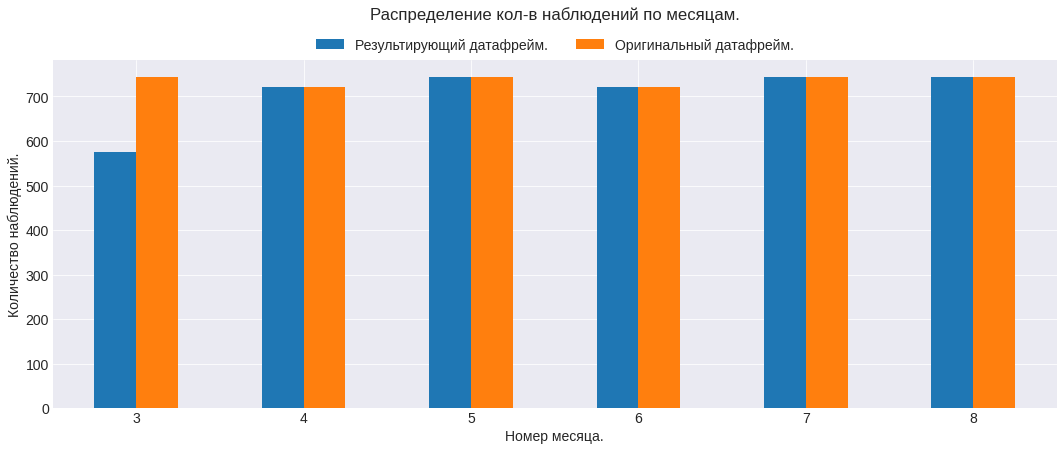

In [12]:
# Создадим признаки отставания для всех часов в интервале [2 ; 24].
lags = np.arange(1, HRS_IN_DAY + 1, 1)

# Добавим отставание в неделю.
lags = np.append(lags, 
                 np.arange(HRS_IN_DAY, HRS_IN_DAY * 7 +1, HRS_IN_DAY))
    
# Вызовем функцию и создадим признаки.
df_feats = make_features(df, target = TARGET, lags = lags, 
                         roll_window = [HRS_IN_DAY, HRS_IN_DAY * 7])
# Проверим результат.
get_eda_info(data = df_feats, data_add = df, target = 'num_orders', 
             describe = False, info = False,
             title = 'Датафрейм со всеми созданными признаками.', 
             head = 5)

#### Создание признаков. Вывод.
- Было создано $40$ новых признаков.
- Для создания признаков с максимальным отставанием в $1$ неделю было удалено $24 * 7 = 168$ наблюдений из начала датафрейма, из первого месяца в данных - марта, что отображено на столбчатой диаграмме.
- Данные в результирующем датафрейме расположены хронологически.

## Анализ и предварительный отбор признаков.

[К содержанию.](#tableofcontents)

---
- Проанализируем созданные признаки.
- Выделим кандидатов на удаление.

### Корреляция признаков, мультиколлинеарность.

[К содержанию.](#tableofcontents)

---
Т.к. в созданных признаках присутствуют категориальные, например, день недели или месяца и др., для вывода информации о корреляции воспользуемся библиотекой `Phi_K`.

#### Функция вывода информации о корреляции признаков.
Создадим функцию вывода информации о корреляции признаков, воспользовавшись библиотекой `Phi_K`, которая примет датафрейм и выведет тепловую карту матрицы корреляции с коэффициентами корреляции Пирсона для линейных зависимостей и коэффициентами $\phi_k$ (модифицированный $\chi^2$) для нелинейных зависимостей.

In [13]:
# Функция вывода информации о корреляции признаков.
def get_phik_data(data: pd.DataFrame) -> None:

    # Матрица корреляции модифицированных коэфф. Хи^2.
    phik_correlation = data.phik_matrix(verbose = False)

    # Установим параметры графиков.
    mask_corr = np.triu(np.ones_like(phik_correlation, dtype = bool))
    palette = ['#f0edee', '#d9c1c3', '#ba9195', '#a65050', '#030000']

    # Построим график.
    plt.figure(figsize=(18,17))
    sns.heatmap(phik_correlation,
                mask = mask_corr, cmap = sns.color_palette(palette, 5), 
                vmax = 1.0, center = .5, square = True,
                linewidths = .2, cbar_kws = {"shrink": .5})
    plt.title('Матрица корреляции. \nКоэффициенты Пирсона или $\phi_K$ '+
              '(модифицированный $\u03C7^2$).')
    plt.xticks(rotation = 60, ha = 'right', rotation_mode = 'anchor')
    plt.show();

#### Вывод информации о корреляции признаков.
- Выведем матрицу корреляции признаков.

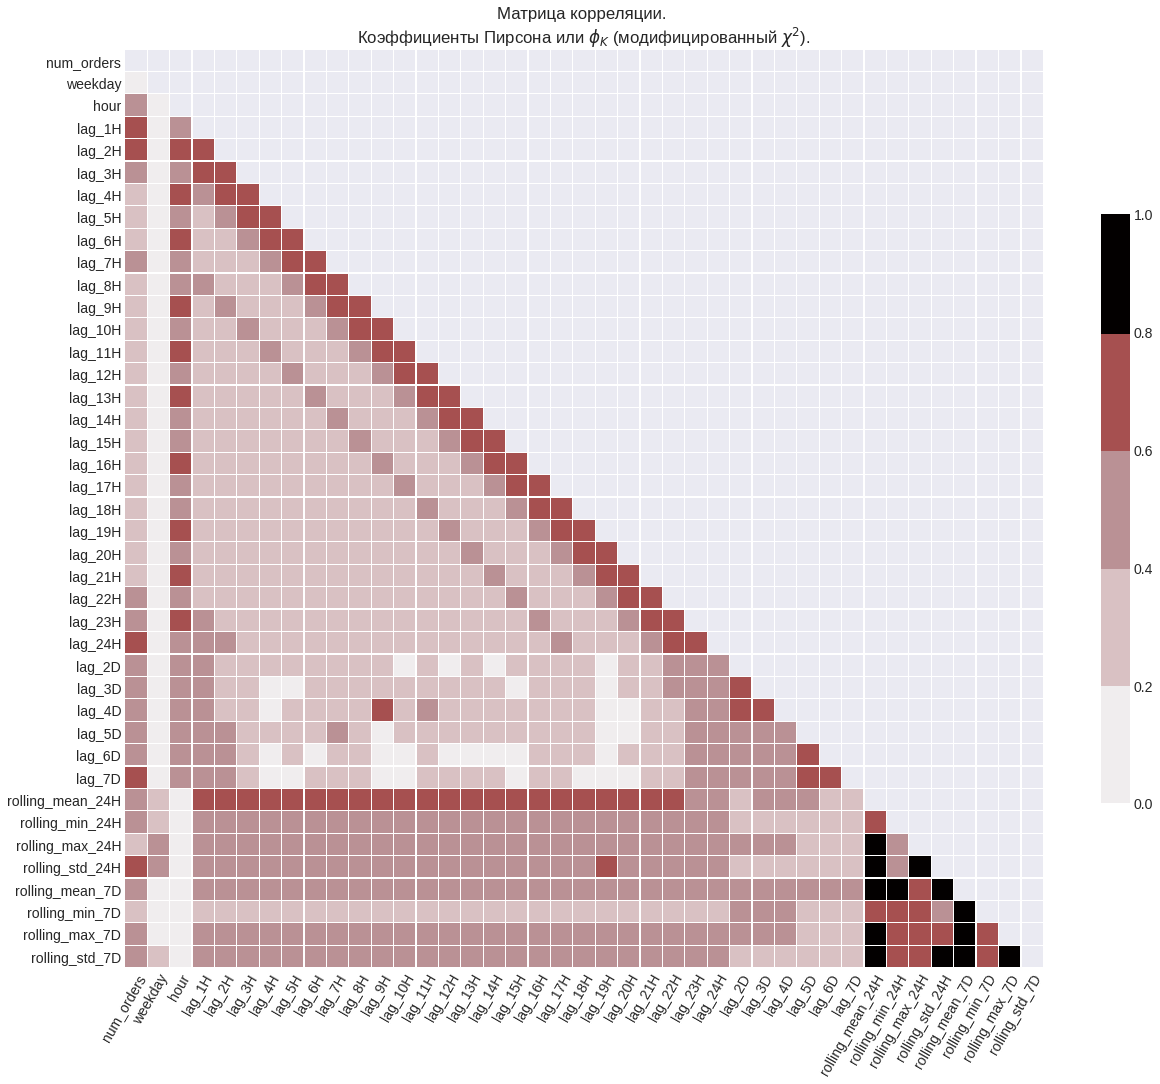

In [14]:
get_phik_data(df_feats)

#### Корреляция признаков. Вывод.
- Обнаружена мультиколлинеарность признаков:
  - признаки, созданные по скользящему окну, коррелируют друг с другом;
  - признаков, созданных друг из друга;
- Обнаружена корреляция целевого признака и признаков
  - отставания в $1$, $2$ часа и $1$ и $7$ дней;
  - скользящего стандартного отклонения с окном в $1$ сутки.<br><br>

- Во избежание дестабилизации линейных моделей и усложнения работы и интерпретации результатов моделей, основанных на деревьях, предварительно отберём предикторы не коррелирующие с остальными.
  - Признаки-кандидаты для обучения:
    - без значимой корреляции с другими;
    - обладающие корреляцией с целевым: 
      - `lag_1H`;
      - `lag_2h`; 
      - `lag_24H`; 
      - `rolling_std_24H`;
    - мультиколлинеарные, которые могут заменить несколько: 
      - `rolling_min_7D`:
        - коррелирует и может заменять наибольшее кол-во признаков (`rolling_std_7D` /  / `rolling_max_7D`);
        - интуитивно должен содержать больше информации, чем признаки содержащие номера дней и пр. сами по себе;
      - `rolling_std_24H` - коррелирует и может заменять наибольшее кол-во признаков, построенных по скользящему окну, при этом, не коррелирует с другими признаками и имеет среднюю корреляцию с целевым;
  - Признаки-кандидаты на удаление:
    - признаки, у которых есть замена, из предыдущего пункта;
    - мультиколлинеарные, созданные по скользящему окну, с отсутствующей корреляцией с целевым: 
      - `rolling_max_24H`;
      - `rolling_min_24H`;
      - `rolling_mean_24H`;
      - `rolling_mean_7D`;
      - `rolling_std_7D`;
      - `rolling_max_7D`.
      
- Запишем признаки-кандидаты на удаление для линейных моделей в список и продолжим отбор после разделения на подвыборки.

In [15]:
drop_candidates = ['month', 'week', 'day_of_year', 'is_weekend',
                   'rolling_mean_24H', 'rolling_min_24H', 
                   'rolling_max_24H',  'rolling_mean_7D', 
                   'rolling_std_7D', 'rolling_max_7D']

### Анализ и предварительный отбор признаков. Вывод.
- Была проанализирована матрица корреляции признаков.
- Были отобраны признаки-кандидаты на удаление для линейных моделей.
- Продолжим отбор признаков индивидуально для каждой модели после разделения выборок.

## Разделение выборок.

[К содержанию.](#tableofcontents)

---
- Зададим константу кол-ва наблюдений валидационной или тестовой подвыборок в соответствии с условием задачи - $10\%$ от финального кол-ва наблюдений в предобработанной исходной выборке.
- Создадим функцию разделения на выборки.
- Разделим данные на обучающую и тестовую выборку.

### Размер тестовой выборки.

In [16]:
TEST_SIZE = round(df_feats.shape[0] * TEST_RATIO)
print(f'Кол-во наблюдений в валидационной или тестовой '+
      f'выборках: {TEST_SIZE}')

Кол-во наблюдений в валидационной или тестовой выборках: 425


### Функция разделения выборок.

[К содержанию.](#tableofcontents)

---
Зададим функцию которая
- примет на вход
  - датафрейм, целевой признак и размеры выборок;
  - доп. параметры выводы результатов разделения;
  - метку вывода данных без отделения доп. признаков (для доп. моделей);
  - метку вывода списка названий признаков для масштабирования;
- разделит датафрейм на обучающую, опционально валидационную и тестовую выборки;
- выведет результат разделения;
- вернёт результирующие выборки в зависимости от меток.

In [17]:
# Функция разделения выборок.
def ts_tts(data : pd.DataFrame, 
           target : str = TARGET, 
           test_size : int = None, 
           validation_size : int = None,
           header : str = None,
           figsize : tuple = (MPL_WIDTH, MPL_HEIGHT * 1.2), 
           seed : any = SEED,
           return_target_split : bool = True,
           return_data : bool = False,
           return_cols_to_scale : bool = False,
           verbose : int = 1):
    
    # Зададим список сбора данных для вывода.
    data_total = []
    
    # Выведем заголовок при необходимости.
    if header: print_c(header)
    
    # Разделим данные на обучающую, опционально валидационную 
    # и тестовую выборки.
    if not validation_size:
        train, test = train_test_split(
            data, test_size = test_size, 
            shuffle = False, random_state = SEED
            )
        # Cбор данных для вывода.
        if return_data: data_total.append([train, test])
    else:
        train_, test = train_test_split(
            data, test_size = test_size, 
            shuffle = False, random_state = SEED
            )
        train, validation = train_test_split(
            train_, test_size = validation_size, 
            shuffle = False, random_state = SEED
        )
        # Cбор данных для вывода.
        if return_data: data_total.append([train, validation, test])

    # Разделим предикторы и целевой признак.
    X_train, y_train = train.drop('num_orders', axis = 1), train[target]
    # Cбор данных для вывода.
    if return_target_split: data_total.append([X_train, y_train])
    if validation_size:
        X_val, y_val = (validation.drop('num_orders', axis = 1), 
                        validation[target])
        # Cбор данных для вывода.
        if return_target_split: data_total.append([X_val, y_val])
    X_test, y_test = test.drop('num_orders', axis = 1), test[target]
    # Cбор данных для вывода.
    if return_target_split: data_total.append([X_test, y_test])
    
    if verbose > 0:
        # Выведем размерности.
        print('Размерность обучающей выборки: \n'+
              f'Предикторы: {X_train.shape};'+
              f'  Целевой признак: {y_train.shape}'+
              '  Процент от исходного датафрейма: '+
              f'{X_train.shape[0] / df_feats.shape[0]:.2%}\n\n')
        if validation_size:
            print('Размерность обучающей выборки: \n'+
              f'Предикторы: {X_val.shape};'+
              f'  Целевой признак: {y_val.shape}'+
              '  Процент от исходного датафрейма: '+
              f'{X_val.shape[0] / df_feats.shape[0]:.2%}\n\n')
        print('Размерность тестовой выборки:\n'+
              f'Предикторы: {X_test.shape};'+
              f'  Целевой признак: {y_test.shape}'+
              '  Процент от исходного датафрейма: '+
              f'{X_test.shape[0] / df_feats.shape[0]:.2%}')

        print('\n')

        # Выведем графики с разбиением выборок.
        if validation_size:
            train_val_test = pd.concat([train[target], 
                                        validation[target], 
                                        test[target]])
            ts_plot(
                train_val_test, 
                data_add = [train_val_test.loc[validation.index.min() : 
                                               validation.index.max()],
                            train_val_test.loc[test.index.min() : ]], 
                legend = [f'Обучающая выборка.', 
                          'Валидационная выборка.', 
                          'Тестовая выборка.'],
                figsize = (MPL_WIDTH, MPL_HEIGHT * 1.2)
            )
        else:
            train_test = pd.concat([train[target], test[target]])

            ts_plot(train_test, data_add = [train_test.loc[test.index.min():]], 
                    legend = [f'Обучающая выборка.', 'Тестовая выборка.'],
                    figsize = (MPL_WIDTH, MPL_HEIGHT * 1.2)
                   )
    
    
    # Создадим список признаков для масштабирования.
    if return_cols_to_scale:
        cols_to_scale = []
        for col in [c for c in data.columns if c != target]:
            if data[col].nunique() <= 2:
                if not (0 in data[col].unique() and \
                        1 in data[col].unique()):
                    cols_to_scale.append(col)
            else:
                cols_to_scale.append(col)
        # Cбор данных для вывода.
        data_total.append([cols_to_scale])
    
    # Вернём в зависимости от меток.
    return [el for row in data_total for el in row]

### Разделение выборок.

[К содержанию.](#tableofcontents)

---
- Вызовем функцию и выделим выборки для основных моделей.
  - Выделение проведём с помощью функции `train_test_split` <br>библиотеки `Scikit-Learn`, учитывая природу данных, без перемешивания наблюдений (`shuffle = False`).
  - Размер валидационной и тестовой подвыборок установим в соответствии с условием задачи - $10\%$.

Размерность обучающей выборки: 
Предикторы: (3398, 40);  Целевой признак: (3398,)  Процент от исходного датафрейма: 79.99%


Размерность обучающей выборки: 
Предикторы: (425, 40);  Целевой признак: (425,)  Процент от исходного датафрейма: 10.00%


Размерность тестовой выборки:
Предикторы: (425, 40);  Целевой признак: (425,)  Процент от исходного датафрейма: 10.00%




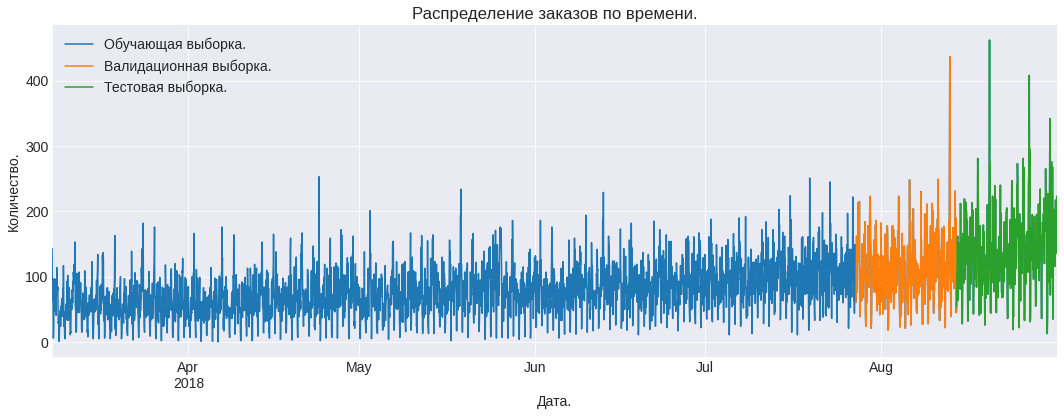

In [18]:
(X_train, y_train,
 X_val, y_val,
 X_test, y_test) = ts_tts(
    df_feats, 
    test_size = TEST_SIZE,
    validation_size = TEST_SIZE,
    header = ('Оригинальный временной ряд <br>после ресемплинга и '+
              'создания признаков.')
)

## Обучение.

[К содержанию.](#tableofcontents)

---
- Т.к. было сгенерировано большое кол-во дополнительных признаков, автоматизируем процесс их отбора.
- Для этого зададим функцию отбора признаков и гиперпараметров.
- Протестируем следующие модели:
  - Линейная регрессия - `LinearRegression`, библиотеки `Scikit-Learn`;
  - Дерево решений - `DecisionTreeRegressor`, библиотеки `Scikit-Learn`;
  - Градиентный бустинг `CatBoostRegressor`, библиотеки `CatBoost`.
- Дополнительно протестируем следующие модели:
  - Алгоритм прогнозирования временных рядов `Prophet`;
  - Многослойная рекуррентная нейронная сеть - `LSTM`, фреймворка `PyTorch`.

### Функция отбора признаков и подбора гиперпараметров.

[К содержанию.](#tableofcontents)

---
- Для трёх основных алгоритмов зададим функцию, которая
  -  примет на вход 
    - обучающую и валидационную выборки;
    - метку типа модели;
    - гиперпараметры для модели (кроме линейной регресии);
    - кол-ва признаков для перебора и направление поиска для алгоритма `SequentialFeatureSelector`;
    - функцию оценки для оптимизации для алгоритмов библиотеки `Scikit-Learn`;
    - кол-во
    - кол-во фолдов, разбиений на подвыборки, для поиска признаков минимизирующих целевую метрику $RMSE$;
    - размер подвыборки (аналогичный размеру тестовой выборки);
    - метку сохранения лучшей модели;
  - для линейной регрессии закодирует цикличные категориальные признаки методом прямого кодирования (`OneHotEncoding`):
    - `weekday`, `hour`;
  - отберёт признаки улучшающие целевую метрику $RMSE$ для переданных кол-в признаков и оценит целевую метрику моделей с отобранными признаками;
  - для дерева решений проведёт кросс-валидацию с поиском оптимальных гиперпараметров;
  - построит и выведет графики важности признаков для оптимальной модели и кол-ва признаков и распределения реальных и спрогнозированных данных;
  - опицонально запишет данные модели и названия признаков в список;
  - опционально вернёт данные модели и названия признаков в список.
  
  
> _Примечание:_
> - разделение на подвыборки для кросс-валидации при отборе признаков и гиперпараметров проводится с учётом природы данных, методом `TimeSeriesSplit`.

In [19]:
def test_stand(
    X : pd.DataFrame = None,
    y : pd.Series = None,
    X_eval : pd.DataFrame = None,
    y_eval : pd.Series = None,
    lr : bool = False,
    #(убрал 'is_month_start', 'is_month_end', `is_weekend` 
    # из списка порядковых, т.к. ошибка
    ohe_cols :list = ['weekday', 'hour'], 
    dtr : bool = False,
    dtr_params : dict = None,
    cbr : bool = False,
    model : any = None,
    n_feats : int = 10,
    direction : str = 'forward',
    scoring_fn : str = 'neg_root_mean_squared_error',
    n_splits : int = 5,
    test_size : int = round(df_feats.shape[0] * TEST_RATIO),
    seed : any = SEED,
    suptitle_add : str = '',
    save_model : bool = False,
    verbose = 1
):
    
    # Зададим модели.
    if lr:
        model = LinearRegression()
        # Кодирование для регрессии.
        ohe_cols = [c for c in ohe_cols if c in X.columns]
        ohe = ColumnTransformer([
            ('ohe', 
             OneHotEncoder(drop = 'first', handle_unknown = 'error'),
             ohe_cols), 
            ], remainder = 'passthrough')
    elif dtr:
        model = DecisionTreeRegressor(random_state = seed)
    elif cbr:
        model = CatBoostRegressor(iterations = 1000, 
                                  random_seed = seed,
                                  logging_level = 'Silent')
    elif model is not None:
        model = model
    else:
        raise ValueError('Модель не указана.')
        
    y_preds = None  

    # Отберём признаки с перебором кол-ва финальных 
    # признаков и оптимизацией RMSE.
    # Зададим переменные для отбора признаков.
    rmse_best = 1000
    params_ = None
    timing = 0
    best_timing = None
    features_best = None
    best_importances = None
    n_feats = [n_feats] if isinstance(n_feats, int) else n_feats

    for n in tqdm(n_feats):
        if lr or dtr:
            # Зададим экземпляры классов разбиения ряда,
            # отбора признаков и поиска по сетке.
            tss = TimeSeriesSplit(n_splits = n_splits, 
                                  test_size = test_size)
            sfs = SequentialFeatureSelector(
                model, 
                n_features_to_select = n, 
                direction = direction,
                scoring = scoring_fn,
                cv = tss
            )

            # Зададим пайплайн.
            sfs_pipe = Pipeline(steps = [('sfs', sfs), 
                                         ('model', model)])
            # Добавим в пайплайн кодирование для регрессии.
            if lr: sfs_pipe.steps.insert(0, ['ohe', ohe])

            # Отберём признаки.
            sfs_pipe.fit(X, y)


            if lr: 
                # Декодируем и запишем названия признаков.
                col_names = pd.Series(sfs_pipe['ohe'].get_feature_names())
                for i, name in enumerate(ohe_cols):
                    col_names = col_names.str.replace(f'.*x{i}', 
                                                      f'{name}')
                # Вычислим метрику на отобранных признаках.
                y_preds = sfs_pipe.predict(X_eval)
                rmse = mean_squared_error(y_eval, 
                                          y_preds, 
                                          squared = False)
                # Запишем названия отобранных признаков.
                selected_features = []
                for el, mask in zip(col_names, sfs_pipe['sfs'].get_support()):
                    if mask:
                        selected_features.append(el)            

            elif dtr:
                # Вычислим метрику на отобранных признаках с указанными 
                # параметрами.
                selected_features = X.loc[:, sfs_pipe['sfs'].get_support()].columns
                gs = GridSearchCV(estimator = model, 
                                  param_grid = dtr_params, 
                                  cv = tss, 
                                  scoring = 'neg_root_mean_squared_error')
                gs.fit(pd.concat([X, X_eval])[selected_features], 
                       pd.concat([y, y_eval]))
                params_ = gs.best_params_
                rmse = round(- gs.best_score_, 4)

                # Получим предсказания на валидационной выборке.
                timing = perf_counter() # таймер
                model.set_params(**gs.best_params_)
                model.fit(X_train[selected_features], y_train)
                y_preds_dtr = model.predict(X_eval[selected_features])
                timing = perf_counter() - timing # таймер


        elif cbr:
            # Зададим параметры подбора признаков для модели
            # библиотеки CatBoost.
            summary = model.select_features(
                X, 
                y.values,
                features_for_select = X.columns,
                num_features_to_select = n,
                eval_set = (X_eval, y_eval),
                algorithm = 'RecursiveByLossFunctionChange',
                steps = 3,
                train_final_model = False,
                logging_level = 'Silent'
            )
            selected_features = summary['selected_features_names']

            # Получим лучшую RMSE модели на валидационной выборке с 
            # отобранными признакми и названия признаков.
            timing = perf_counter() # таймер
            model.fit(X[selected_features], y)
            y_preds = model.predict(X_eval[selected_features])
            timing = perf_counter() - timing # таймер
            rmse = mean_squared_error(y_eval, y_preds, 
                                      squared = False)
                
        # Запишем лучшие rmse и модель.
        if rmse_best <= rmse:
            continue
        rmse_best = round(rmse, 4)
        y_preds_best = y_preds if lr or cbr else y_preds_dtr
        params_best = params_
        features_best = selected_features
        best_model = model
        best_timing = timing
        if lr: 
            best_importances = sfs_pipe['model'].coef_
            # Замерим время обучения и предсказания лин. регрессии.
            best_timing = perf_counter() # таймер
            lr_timing = LinearRegression()
            lr_timing.fit(X, y)
            lr_timing.predict(X_eval)
            best_timing = perf_counter() - best_timing # таймер
        if dtr: best_importances = sfs_pipe['model'].feature_importances_
        if cbr: best_importances = model.feature_importances_

            
    # Выведем результат.        
    if verbose > 0:
        print_c(f'Модель "{type(model).__name__}". RMSE : {rmse_best} .')
        
        # Выведем график важности отобранных признаков.
        plt.figure(figsize = (MPL_WIDTH, 
                              MPL_HEIGHT * .7 * \
                              round(np.log(len(features_best)), 1)))
        coeffs = pd.DataFrame(best_importances,
                              features_best, 
                              ['importance'])
        coeffs['abs'] = coeffs.importance.apply(np.abs)
        coeffs = (coeffs
                  .sort_values(by = 'abs')
                  .drop('abs', axis = 1))
        coeffs.importance.plot.barh()
            
        plt.title('Важность отобранных признаков для модели '+
                  f'"{type(model).__name__}".\nRMSE : {rmse_best} .')
        plt.xlabel('Важность.')
        plt.ylabel('Признак.')
        plt.show();
        
        # Выведем график прогнозов и реальности.
        if lr or cbr:
            std = (sum((y_eval - y_preds) ** 2) / len(y_eval) - 1) ** .5
        elif dtr:
            std = gs.cv_results_['std_test_score'].mean()
        comp_data = pd.DataFrame(index = y_eval.index)
        comp_data['Реальность'] = y_eval
        comp_data['Прогноз'] = y_preds_best
        comp_data['Нижняя граница ошибки'] = y_preds_best - (rmse_best + 1.96 * std)
        comp_data['Верхняя граница ошибки'] = y_preds_best + (rmse_best + 1.96 * std)
        
        fig, ax = plt.subplots()
        cycler = plt.cycler(linestyle = ['-', '-', '--', '--'],
                            color = ['royalblue', 'red', 'gray', 'gray'],
                            alpha = [1.0, 1.0, .7, .7])
        ax.set_prop_cycle(cycler)
        ts_plot(comp_data, 
                overlay = True,
                figsize = (MPL_WIDTH, MPL_HEIGHT * 1.2),
                suptitle_add = f'\nRMSE : {rmse_best} .',
                legend = comp_data.columns,
                ax = ax)
    
    # Вернём в зависимости от меток.
    if save_model:
        try:
            globals()['model_list'].append([type(model).__name__, rmse_best, best_timing,
                                            params_best, features_best])
        except:
            globals()['model_list'] = []
            globals()['model_list'].append([type(model).__name__, rmse_best, best_timing,
                                            params_best, features_best])
        print('\nПараметры модели добавлены в список: "model_list".')
    elif not save_model and dtr_params:
        return features_best, params_best
    elif not save_model and not dtr_params:
        return features_best

### Линейная регрессия `LinearRegression`.

[К содержанию.](#tableofcontents)

---
- Установим кол-во признаков в результирующей выборке в интервале $[1; 25]$ для объективности оценки.
- Вызовем функцию и выведем результаты отбора признаков.

  0%|          | 0/20 [00:00<?, ?it/s]

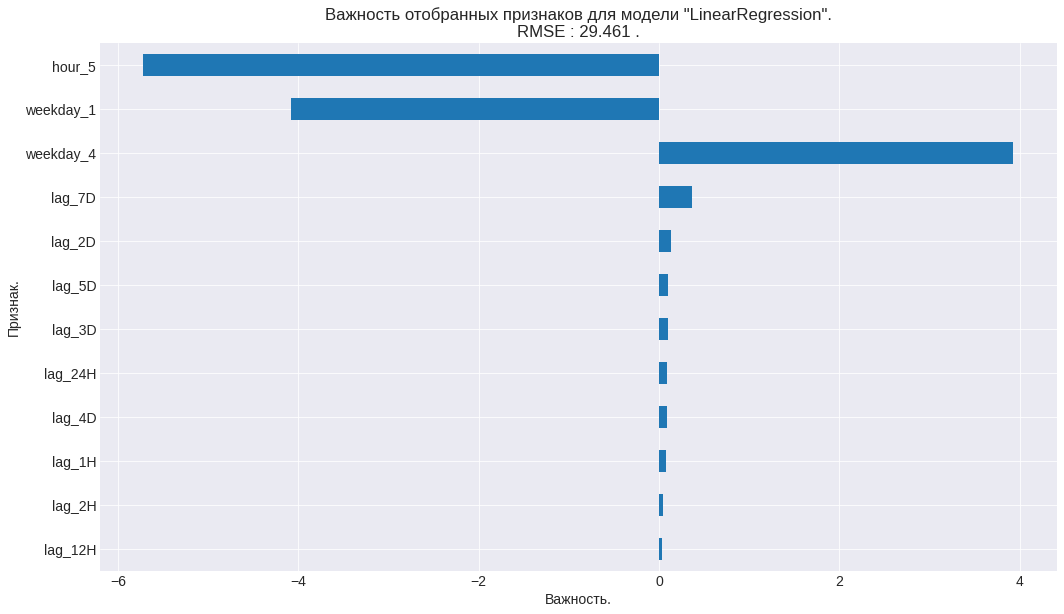

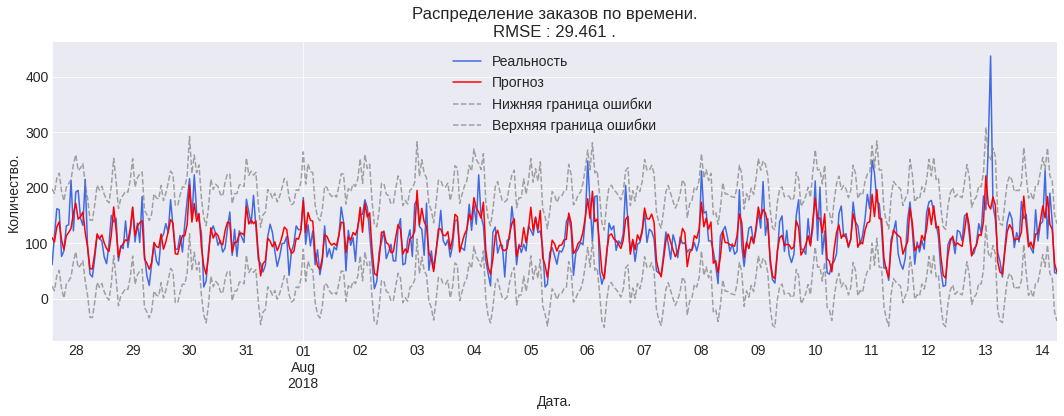


Параметры модели добавлены в список: "model_list".
CPU times: user 6min 28s, sys: 5min 3s, total: 11min 31s
Wall time: 11min 34s


In [20]:
%%time
test_stand(X_train, y_train, X_val, y_val, lr = True,
           n_feats = np.arange(5, 25, 1),
           save_model = True)

#### Линейная регрессия `LinearRegression`. Вывод.

[К содержанию.](#tableofcontents)

---
- Модель показала значение $RMSE$ на валидационной выборке ниже порогового.
- Модель не очень точно следует сезонности, но в среднем, за исключением пиков, например в районе $6$ и $13$ августа, следует реальным данным.
- Алгоритм отбора признаков остановился на $12$ признаках ни один из которых не входит в список кандидатов на удаление, что, возможно, косвенно подтверждает верность анализа корреляции.
- Самыми важными признаками для линейной регрессии являются:
  - `hour_5`: 5 утра - суточный минимум, который наблюдался на графике суточной сезонности, что подтверждает отрицательный коэффициент;
  - `weekday_1`, `weekday_4`: вторник и пятница со спадом и ростом кол-ва заказов соответственно;
  - `lag_7D`: признак, отображающий недельную сезонность.

### Дерево решений `DecisionTreeRegressor`.
[К содержанию.](#tableofcontents)

---

- Установим кол-во признаков в результирующей выборке в интервале $[1; 25]$.
- Установим диапазон глубины деревьев в интервале $[1; 30]$ во избежание сильного переобучения и дадим алгоритму возможность выбирать макс. кол-во признаков при разделении.
- Вызовем функцию и выведем результаты отбора признаков.

  0%|          | 0/23 [00:00<?, ?it/s]

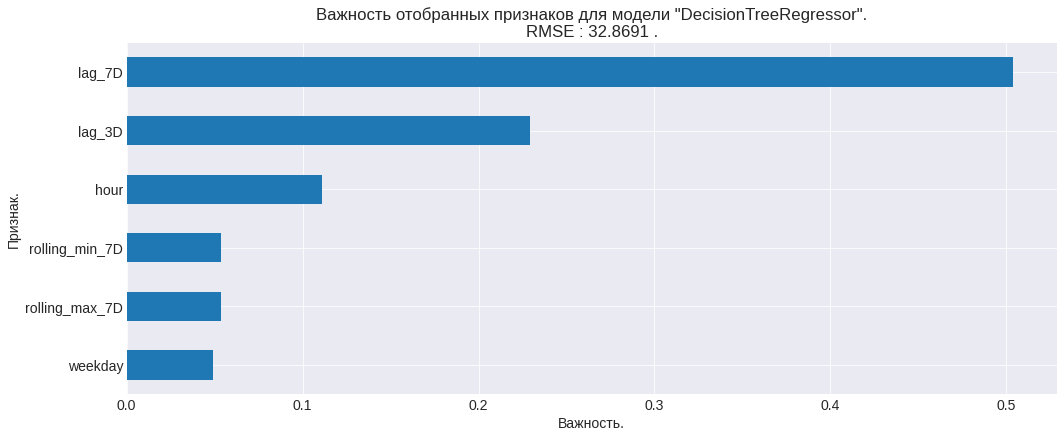

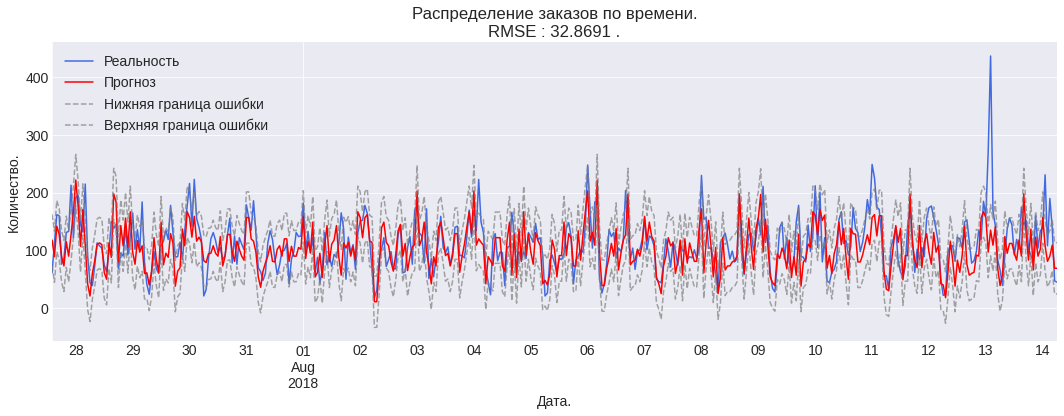


Параметры модели добавлены в список: "model_list".
CPU times: user 4min 24s, sys: 1.1 s, total: 4min 25s
Wall time: 4min 26s


In [21]:
%%time
test_stand(X_train, y_train, X_val, y_val, 
           dtr = True, dtr_params = {'max_depth' : [1, 30],
                                     'max_features' : ['sqrt', 'log2']},
           n_feats = np.arange(2, 25, 1),
           save_model = True)

#### Дерево решений `DecisionTreeRegressor`. Вывод.
[К содержанию.](#tableofcontents)

---

- Модель показала значение $RMSE$ на валидационной выборке ниже порогового и хуже линейной регрессиии.
- Модель не очень точно следует сезонности, и, в целом, менее стабильна, склонна к спорадическим пикам и спадам.
- Алгоритм отбора признаков остановился на $6$ признаках, самыми важными из которых являются:
  - `lag_..D`: признаки, отображающие недельную сезонность.
  - `hour`.

### Градиентный бустинг `CatBoostRegressor`.
[К содержанию.](#tableofcontents)

---

- Установим диапазон глубины деревьев в интервале $[1; 20]$ и дадим алгоритму возможность выбирать макс. кол-во признаков при разделении.
- Вызовем функцию и выведем результаты отбора признаков.

  0%|          | 0/4 [00:00<?, ?it/s]

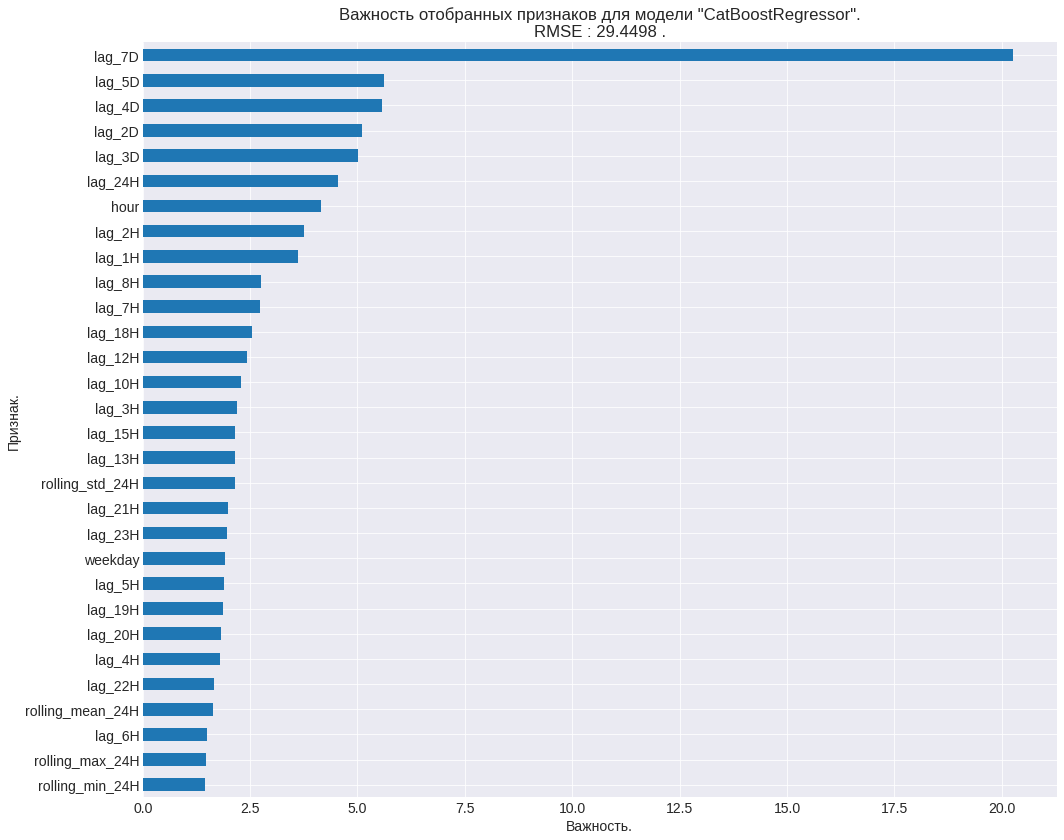

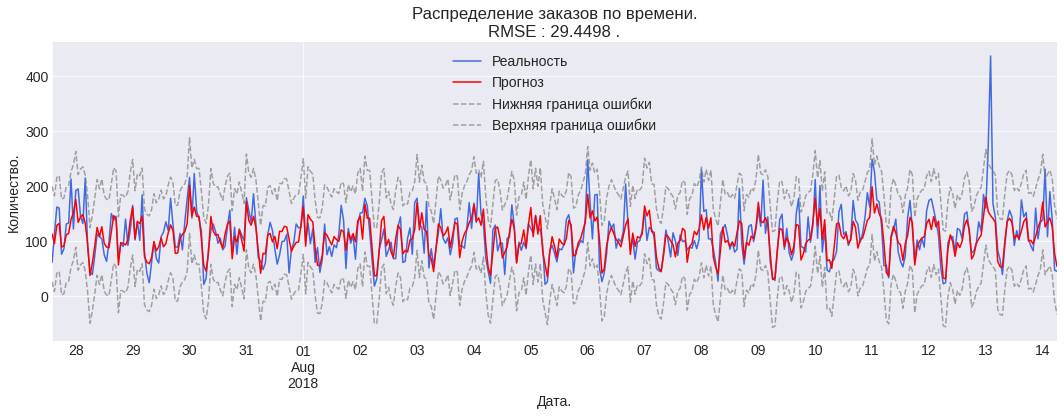


Параметры модели добавлены в список: "model_list".
CPU times: user 1min 29s, sys: 3.35 s, total: 1min 33s
Wall time: 1min 52s


In [22]:
%%time
test_stand(X_train, y_train, X_val, y_val,
           cbr = True, n_feats = [5, 10, 20, 30],
           save_model = True)

#### Градиентный бустинг `CatBoostRegressor`. Вывод.
[К содержанию.](#tableofcontents)

---

- Модель показала значение $RMSE$ на валидационной выборке ниже порогового и приблизительно одинаковые с линейной регрессией и деревом решений.
- Судя по графику распределения для прогноза и исходных данных, модель следует сезонности точнее, чем предыдущие, и, но не захватывает экстремумы. Возможно, дообработка данных и перебор дополнительных гиперпараметров улучшит результат.
- Алгоритм отбора признаков остановился на $20$ признаках, самыми важными из которых являются:
  - `lag_7D` и другие признаки с отставанием `lag_...D`: признаки отображают недельную сезонность.
  - `hour`: признак может указывать на шаг суточной сезонности (e.g: $6:00$ - спад и т.д.).
  - `lag_24H`: признак несёт информацию о суточной сезонности.

### Алгоритм прогнозирования `Prophet`.
[К содержанию.](#tableofcontents)

---

Протестируем работу алгоритма прогнозирования `Prophet`.
- Представим проблему как прогнозирование одного временного шага ($1$ час) в многомерном временном ряде.
- Разделим исходные ресемплированные данные с созданными признаками на обучающий, валидационный и тестовый наборы с включённым целевым признаком (размер подвыборок - $10\%$.).
- Приведём данные в формат, доступный для алгоритма:
  - переименуем целевой признак в `y`;
  - создадим признак с датами из индекса и переименуем его в `ds`;
  - проверим результат.
- Создадим функцию обучения модели.
- Вызовем функцию и выведем результат.

- Выделим выборки.

Размерность обучающей выборки: 
Предикторы: (3398, 40);  Целевой признак: (3398,)  Процент от исходного датафрейма: 79.99%


Размерность обучающей выборки: 
Предикторы: (425, 40);  Целевой признак: (425,)  Процент от исходного датафрейма: 10.00%


Размерность тестовой выборки:
Предикторы: (425, 40);  Целевой признак: (425,)  Процент от исходного датафрейма: 10.00%




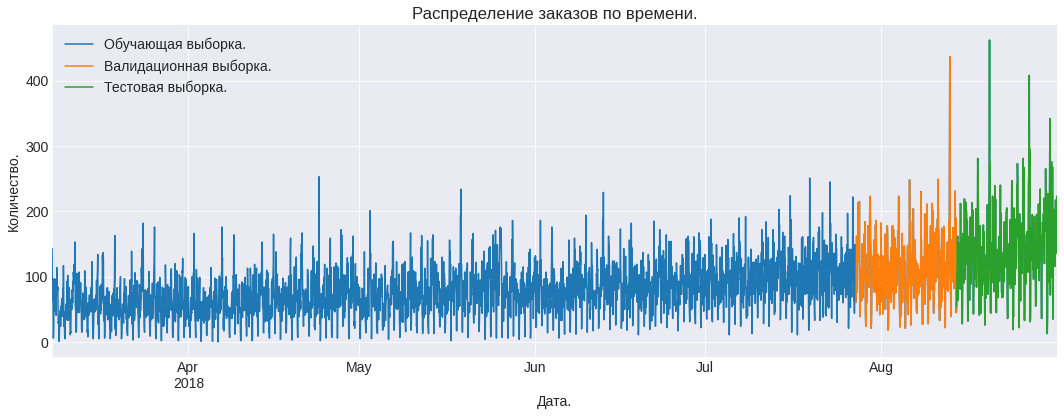

In [23]:
# Разделим исходные данные.
train, validation, test = ts_tts(df_feats, 
                                 validation_size = TEST_SIZE, 
                                 test_size = TEST_SIZE,
                                 return_data = True, 
                                 return_target_split = False)

- Переформатируем данные.
- Проверим результат.

In [24]:
# Функция форматирования данных для Prophet.
def data_to_prophet(data : pd.DataFrame) -> pd.DataFrame:
    data_prophet = (data
            .reset_index()
            .rename(columns = {'datetime' : 'ds', 
                               'num_orders' : 'y'}))
    
    return data_prophet

# Переформатируем данные и проверим резлультат.
for data, name in zip([train, validation, test], 
                      ['train', 'validation', 'test']):
    globals()[f'{name}_prophet'] = data_to_prophet(data)
    display(globals()[f'{name}_prophet']
            .head(3)
            .style
            .set_caption(f'Выборка с целевым признаком "{name}".')
            .set_table_styles(styles))

- Создадим функцию, которая
  - примет обучающую, и валидационную или тестовую выборки, подготовленные для модели `Prophet`;
  - создаст экземпляр класса модели;
  - итеративно добавит экзогенные признаки;
  - обучит модель, сделает прогноз и выведет резуьтат.

In [25]:
def prophet_test_stand(
    train : pd.DataFrame,
    validation : pd.DataFrame,
    header : str = 'Модель Prophet.<br>Валидационная выборка.',
    suptitle_add : str = '\nВалидационная выборка.',
    test = False,
    save_model : bool = False
) -> None:
    
    if header: print_c(header)
        
    # Создадим экземпляр класса модели.
    prophet = Prophet()
    # Итеративно добавим экзогенные признаки.
    for col in train.columns:
        if col not in ['ds', 'y']:
            prophet.add_regressor(col)

    # Обучим модель и вычислим метрику RMSE.
    timing = perf_counter() # таймер
    prophet.fit(train)
    forecast = prophet.predict(validation)
    timing = perf_counter() - timing # таймер
    rmse_prophet = mean_squared_error(validation.y, 
                                      forecast.yhat, 
                                      squared = False)
    # Занесём результат в список.
    if save_model:
        globals()['model_list'].append(['Prophet', rmse_prophet, timing])
        print('\nПараметры модели добавлены в список: "model_list".')

    # Получим коеффициенты.
    prophet_coeffs = prohet_coeffs_(prophet)[['regressor', 'coef']]


    # Выведем график важности отобранных признаков.
    prophet_coeffs['abs'] = prophet_coeffs.coef.apply(np.abs)
    prophet_coeffs.set_index(prophet_coeffs.regressor, inplace = True)
    prophet_coeffs = (prophet_coeffs
                      .sort_values(by = 'abs')
                      .drop(['regressor', 'abs'], axis = 1))
    plt.figure(figsize = (MPL_WIDTH, MPL_HEIGHT * 2.8))
    prophet_coeffs.coef.plot.barh()
    plt.title('Важность признаков для модели '+
              '"Prophet".' + suptitle_add + f' RMSE : {rmse_prophet:.4f} .')
    plt.xlabel('Важность.')
    plt.ylabel('Признак.')
    plt.show();

    # Вычислим данные для графика прогноза.
    std = (sum(((validation.y - forecast.yhat) ** 2) /\
               len(validation.y) - 1) ** .5)
    data = pd.DataFrame()
    data['ds'] = validation.ds
    data['Реальность'] = validation.y
    data['Прогноз'] = forecast.yhat
    data['Нижняя граница ошибки'] = (forecast.yhat - \
                                          (rmse_prophet + 1.96 * std))
    data['Верхняя граница ошибки'] = (forecast.yhat + \
                                           (rmse_prophet + 1.96 * std))
    data.set_index(data.ds, inplace = True)
    data.drop('ds', axis = 1, inplace = True)

    # Выведем график прогнозов и реальности.
    fig, ax = plt.subplots()
    cycler = plt.cycler(linestyle = ['-', '-', '--', '--'],
                        color = ['royalblue', 'red', 'gray', 'gray'],
                        alpha = [1.0, 1.0, .7, .7])
    ax.set_prop_cycle(cycler)
    ts_plot(data, 
            overlay = True,
            figsize = (MPL_WIDTH, MPL_HEIGHT * 1.2),
            suptitle_add = (suptitle_add + f' RMSE : {rmse_prophet:.4f} .'),
            legend = data.columns,
            ax = ax)
    
    # Выведем графики обнаруженных моделью закономерностей.
    forecast.set_index('ds', inplace = True)
    ts_plot(forecast.trend, legend = ['Тренд', 'Границы тренда'],
            ylabel = '',
            suptitle = ('Тренд, обнаруженный моделью Prophet.'+
                        suptitle_add + f' RMSE : {rmse_prophet:.4f} .'),
            fill_between = dict(x = forecast.index, 
                                y1 = forecast.trend_lower, 
                                y2 = forecast.trend_upper, 
                                alpha = .2))
    if test: # для тестовой выборки
        ts_plot(forecast.loc['2018-08-15 00:00:00' : 
                             '2018-08-22 00:00:00']['weekly'], 
                legend = 'Сезонность',
                ylabel = '',
                suptitle = ('Недельная сезонность, обнаруженная моделью Prophet.'+
                            suptitle_add + f' RMSE : {rmse_prophet:.4f} .'))
        ts_plot(forecast.loc['2018-08-15 00:00:00' : 
                             '2018-08-16 00:00:00']['daily'], 
                legend = 'Сезонность',
                ylabel = '',
                suptitle = ('Суточная сезонность, обнаруженная моделью Prophet.'+
                            suptitle_add + f' RMSE : {rmse_prophet:.4f} .'))    
    else: # для валидации
        ts_plot(forecast.loc['2018-08-01 00:00:00' : 
                             '2018-08-08 00:00:00']['weekly'], 
                legend = 'Сезонность',
                ylabel = '',
                suptitle = ('Недельная сезонность, обнаруженная моделью Prophet.'+
                            suptitle_add + f' RMSE : {rmse_prophet:.4f} .'))
        ts_plot(forecast.loc['2018-07-28 00:00:00' : 
                             '2018-07-29 00:00:00']['daily'], 
                legend = 'Сезонность',
                ylabel = '',
                suptitle = ('Суточная сезонность, обнаруженная моделью Prophet.'+
                            suptitle_add + f' RMSE : {rmse_prophet:.4f} .'))    

- Вызовем функцию и выведем результаты.

07:25:43 - cmdstanpy - INFO - Chain [1] start processing
07:25:44 - cmdstanpy - INFO - Chain [1] done processing



Параметры модели добавлены в список: "model_list".


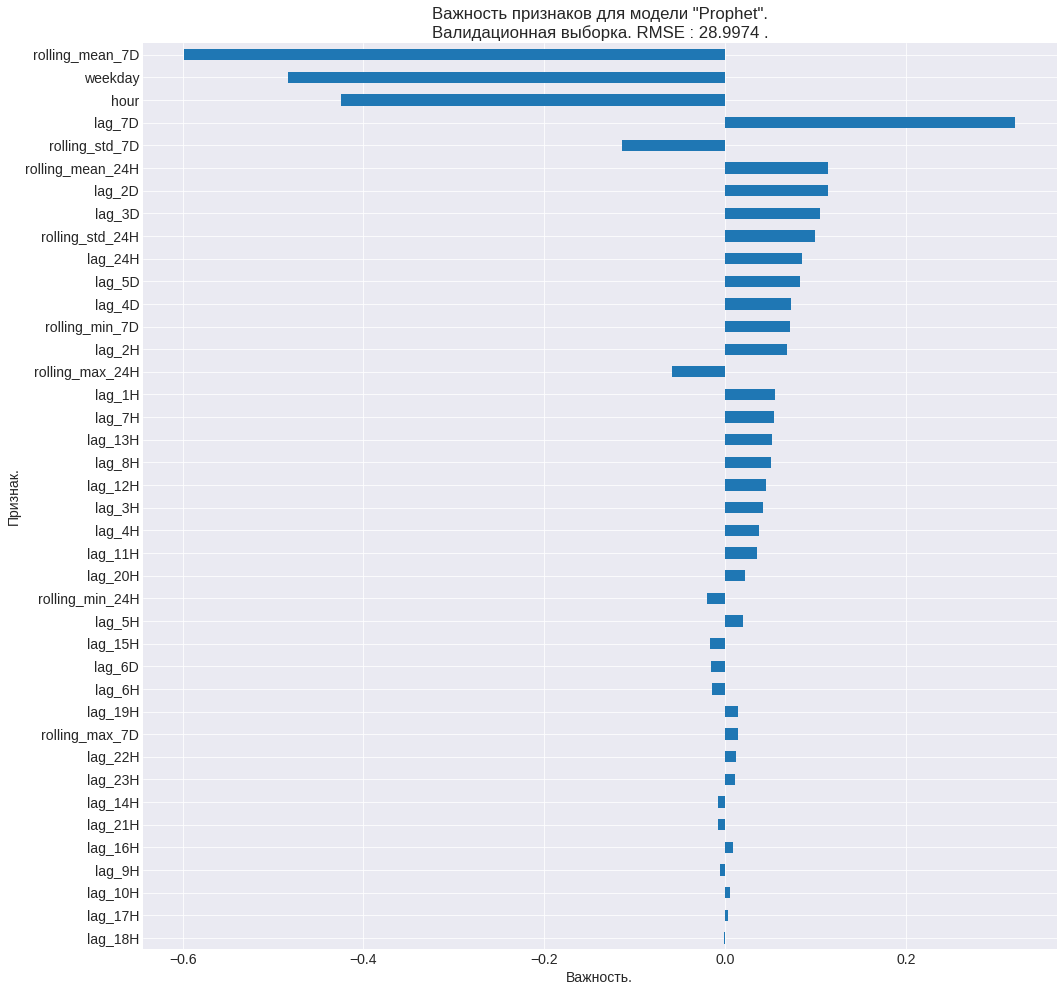

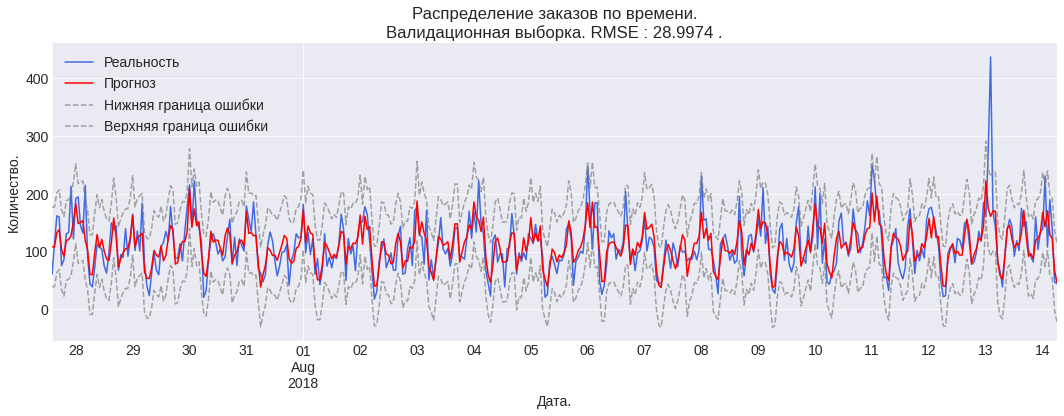

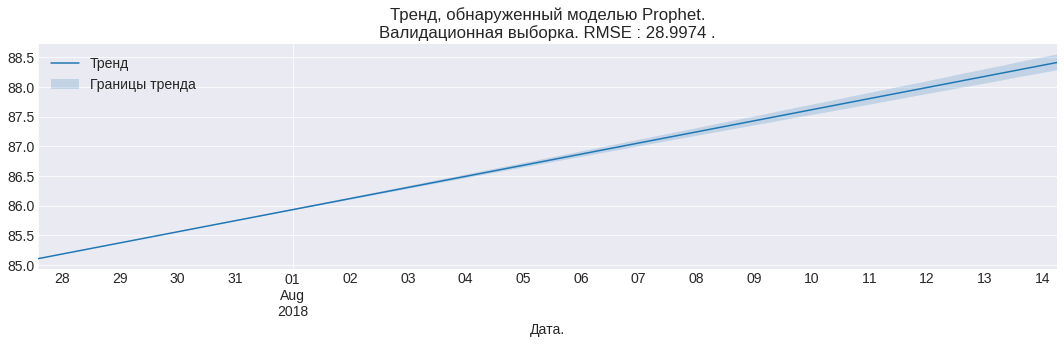

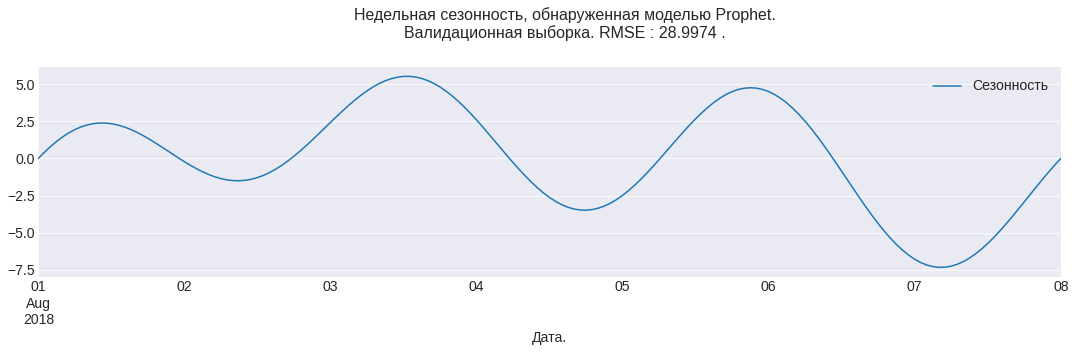

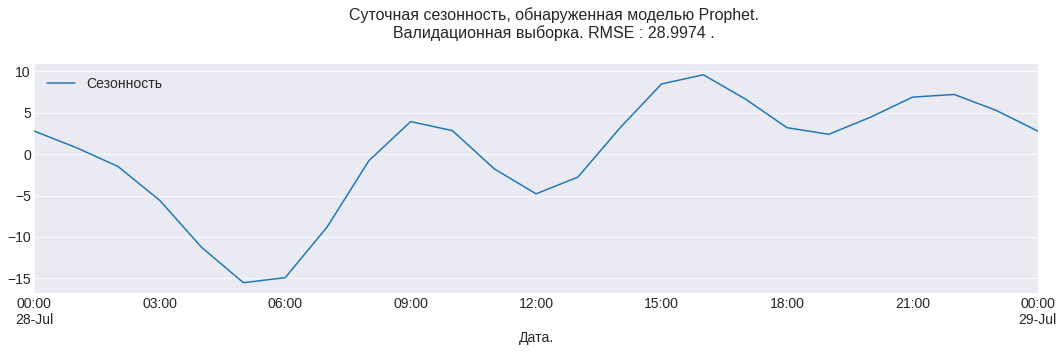

In [26]:
prophet_test_stand(train_prophet, validation_prophet, 
                   header = 'Модель Prophet.<br>Валидационная выборка.',
                   save_model = True)

#### Алгоритм прогнозирования `Prophet`. Вывод.

- Модель показала значение $RMSE$ на валидационной выборке ниже порогового и несколько лучше всех предыдущих.
- Модель хорошо работает "из коробки". Возможно, при донастройке результат улучшится.
- Судя по графику распределения для прогноза и исходных данных, модель, следует сезонностям точнее градиентного бустинга и в некоторых отрезках повторяет исходный график, но не захватывает яркие экстремумы. <br>
Возможно, дообработка данных и перебор дополнительных гиперпараметров улучшит результат.
- Cамыми важными признаками для `Prophet` являются:
  - `month`, `is_month_end`, `is_month_start`: признаки отображают общий тренд;
  - `is_weekend`: признак может указывать на недельную сезонность;
  - `rolling_mean_7D`: признак несёт информацию о недельной сезонности.

### Рекуррентная нейронная сеть `LSTM`.

[К содержанию.](#tableofcontents)

---


- Обучим и протестируем на валидационной выборке алгоритм прогнозирования временных рядов `LSTM`, реализации `PyTorch`.
- Представим проблему как прогнозирование одномерного временного ряда:
  - для учитывания сезонности, установим окно ретроспективы модели, число предыдущих шагов времени для оценки следующего периода, `LOOKBACK_WINDOW` в 24 часа;
  - модель будет прогнозировать на 1 час вперёд.

In [27]:
# Установим размер окна ретроспективы.
LOOKBACK_WINDOW = 24

#### Функция подготовки массивов.
Зададим функцию подготовки массивов для обучения, которая
- примет на вход данные, размер окон ретроспекции (обучения) и предсказания;
- разделит данные на срезы с размерами указанных окон;
- вернет массивы с разделёнными данными.

In [28]:
# Функция форматирования данных.
def prep_array(data, lookback, pred_window):
    X, y = [], []
    for i in range(len(data) - lookback):
        feature = data[i : i + lookback]
        target = data[i + pred_window : i + lookback + pred_window]
        X.append(feature)
        y.append(target)
        
    return np.array(X), np.array(y)

#### Создание класса модели.
Создадим класс модели `LSTM` реализации `PyTorch` 
- с возможностью указания гиперпараметров:
  - размера входящих данных;
  - кол-ва узлов в ячейке `LSTM`;
  - кол-ва слоёв `LSTM`;
  - кол-ва "выключаемых" нейронов;
- с методом `forward`.

In [29]:
class TorchLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, dropout):
        super(TorchLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size = input_size, 
                            hidden_size = hidden_size, 
                            num_layers = 1, 
                            batch_first = True,
                            dropout = 0.0)
        self.linear = nn.Linear(hidden_size, 1)
        
        
    def forward(self, X):
        X, _ = self.lstm(X.float())
        X = self.linear(X)
        
        return X

#### Функция обучения `LSTM`.

[К содержанию.](#tableofcontents)

---

Создадим функцию для обучения модели, которая
- примет на вход
  - данные без выделения целевого признака;
  - размеры окон ретроспекции (обучения) и предсказания ($1$ час);
  - тип модели;
  - гиперпараметры модели;
  - тип оптимизатора;
  - размер батча;
  - кол-во эпох;
  - метки выводы данных и информации;
- смасштабирует данные;
- вызовет функцию подготовки массивов и запишет данные в датасет `PyTorch`;
- создаст экземпляр класса с указанными гиперпараметрами;
- проведёт обучение на указанном кол-ве эпох с оценкой целевой метрики $RMSE$ на переданной валидационной выборке;
- выведет результаты тестирования;
- вернёт модель, преобразователь масштабирования и предсказания.

In [30]:
# Зададим функию обучения модели LSTM.
def train_lstm(train, val, 
               target : list = [TARGET],
               scaler : any = None,
               lookback = HRS_IN_DAY,
               pred_window = 1,
               model = TorchLSTM,
               hidden_size = 10,
               dropout = 0.0,
               optimizer = torch.optim.Adam,
               learning_rate = .001,
               momentum = 0.0,
               weight_decay = 0,
               batch_size = 8,
               n_epochs = 100,
               verbose = 2,
               printout_freq : int = 50,
               save_model = False):
    
    if verbose > 0:
        print('Начало работы...')

    # Подгоовка тензоров.
    X_train, y_train = prep_array(train[target], 
                                    lookback = lookback, 
                                    pred_window = pred_window)
    X_val, y_val = prep_array(val[target], 
                                lookback = lookback, 
                                pred_window = pred_window)
    
    
    # Масштабирование данных для обучающей и валидационной 
    # выборок отдельно.
    try:
        scaler_train = scaler()
        scaler_val = scaler()
        if verbose > 0 and scaler is not None:
            print('Масштабирование...') 
        # fit_transform
        X_train_tensor = torch.tensor(
            scaler_train.fit_transform(X_train[:,:,-1])
        ).unsqueeze(2)
        # Только transform
        y_train_tensor = torch.tensor(
            scaler_train.transform(y_train[:,:,-1])
        ).unsqueeze(2)

        # fit_transform
        X_val_tensor = torch.tensor(
            scaler_val.fit_transform(X_val[:,:,-1])
        ).unsqueeze(2)
        # Только transform
        y_val_tensor = torch.tensor(
            scaler_val.transform(y_val[:,:,-1])
        ).unsqueeze(2)
    except:
        if verbose > 0:
            print('Трансформер не указан. Масштабирование не проводится.')
            return
    
    # Вывод размеров тензоров при необходимости.
    if verbose > 1:
        print('Размер тензоров обучающей выборки:\n'+
              f'- Тензор окон ретроспекции: {X_train_tensor.shape}\n'+
              f'- Тензор шага предсказания: {y_train_tensor.shape}',
              '\nРазмер тензоров валидационной выборки:\n'+
              f'- Тензор окон ретроспекции: {X_val_tensor.shape}\n'+
              f'- Тензор шага предсказания: {y_val_tensor.shape}\n')

    # Создадим экземпляр класса TorchLSTM.
    model_ = model(input_size = len(target),
                   hidden_size = hidden_size, 
                   dropout = dropout)
    # Зададим параметры оптимизации.
    optimizer = optimizer(model_.parameters(), 
                          lr = learning_rate, 
                          weight_decay = weight_decay)
    if model == torch.optim.SGD:
        optimizer.param_groups.append({'momentum': momentum})
    # Зададим функцию потерь.
    loss_func = nn.MSELoss()
    # Запищем данные в датасет PyTorch.
    loader = torch_data_.DataLoader(torch_data_.TensorDataset(
        X_train_tensor.float(), y_train_tensor.float()
    ), shuffle=False, batch_size=batch_size)
    
    # Проведём обучение на указанном кол-ве эпох.
    if verbose > 0:
        print('Начало итерации эпох...')
    n_epochs_ = n_epochs
    train_rmse_ = np.zeros(n_epochs)
    val_rmse_ = np.zeros(n_epochs)
    lstm_start = perf_counter()
    for epoch in tqdm(range(n_epochs_)):
        model_.train()
        for X_batch, y_batch in loader:
            # Прямой проход.
            y_pred = model_(X_batch)
            loss = loss_func(y_pred, y_batch)
            optimizer.zero_grad()
            # Обратный проход.
            loss.backward()
            optimizer.step()
            
        # Запишем RMSE модели на обучающей и валидационной выборках.
        model_.eval()
        with torch.no_grad():
            y_pred = model_(X_train_tensor)
            train_rmse = mean_squared_error(
                y_train[:,:,-1], 
                scaler_train.inverse_transform(y_pred[:,:,-1]),
                squared = False
            )
            train_rmse_[epoch] = train_rmse
            y_pred = model_(X_val_tensor)
            val_rmse = mean_squared_error(
                y_val[:,:,-1], 
                scaler_val.inverse_transform(y_pred[:,:,-1]),
                squared = False
            )
            val_rmse_[epoch] = val_rmse
            if epoch % printout_freq != 0:
                continue
            if verbose > 1:
                print(f'Эпоха {epoch}. RMSE: обучающая выборка '+
                      f'{train_rmse:.4f}. Валидационная выборка '+
                      f'{val_rmse:.4f}')

    # Выведем результаты.
    if verbose > 0:
        print(f'\n\033[1mИтоговая ошибка RMSE на валидационной '+
              f'выборке: {val_rmse_[-1]:.4f}.\nВремя обучения и оценки: '+
              f'{round(perf_counter() - lstm_start) / 60:.0f} минут(ы).\033[0m')
        print('\n')
        ts_plot(pd.DataFrame([train_rmse_, val_rmse_]).T,  overlay = True,
                suptitle = ('Результаты обучения и валидации модели LSTM.'+
                            '\nКорень среднеквадратичной ошибки '+
                            'RMSE по эпохам.'),
                legend = ['Обучающая выборка.', 'Валидационная выборка.'],
                xlabel = 'Эпоха.', ylabel = 'RMSE.')
        
    if save_model:   
        globals()['model_list'].append([model.__name__, val_rmse_[-1], 
                                        perf_counter() - lstm_start])
        print('\nПараметры модели добавлены в список: "model_list".')

- Вызовем функцию и проведём тестирование.

Начало работы...
Масштабирование...
Начало итерации эпох...


  0%|          | 0/100 [00:00<?, ?it/s]


Итоговая ошибка RMSE на валидационной выборке: 44.5521.
Время обучения и оценки: 19 минут(ы).




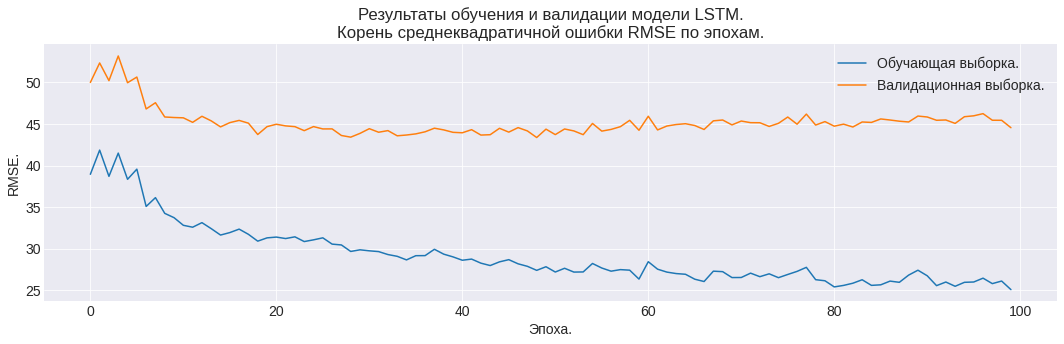


Параметры модели добавлены в список: "model_list".
CPU times: user 19min 7s, sys: 13.3 s, total: 19min 20s
Wall time: 19min 29s


In [31]:
%%time
train_lstm(train, validation, scaler = StandardScaler,
           hidden_size = 64, n_epochs = 100, 
           learning_rate = .01, batch_size = 16,
           printout_freq = 50, verbose = 1, save_model = True)

#### Рекуррентная нейронная сеть `LSTM`. Вывод.

[К содержанию.](#tableofcontents)

---

- Модель показала значение $RMSE$ едва ниже порогового.
- После 40 эпох, модель начинает переобучаться.
- В отличие от других моделей, особенно `Prophet`, модель требует точной настройки и большего времени на обучение.

### Обучение. Вывод.

[К содержанию.](#tableofcontents)

---

- Модель, показавшая лучший результат - `Prophet` - сработала относительно лучше других "из коробки", без подбора гиперпараметров, и хорошо подходит в ситуациях, когда важна скорость прогноза. 
- Модели дерево решений и градиентный бустинг, возможно, покажут лучшие результаты, елси отделить тренд и сезонность и предсказывать их другими средствами с последующим соединением.
- Выведем результаты валидации всех моделей.

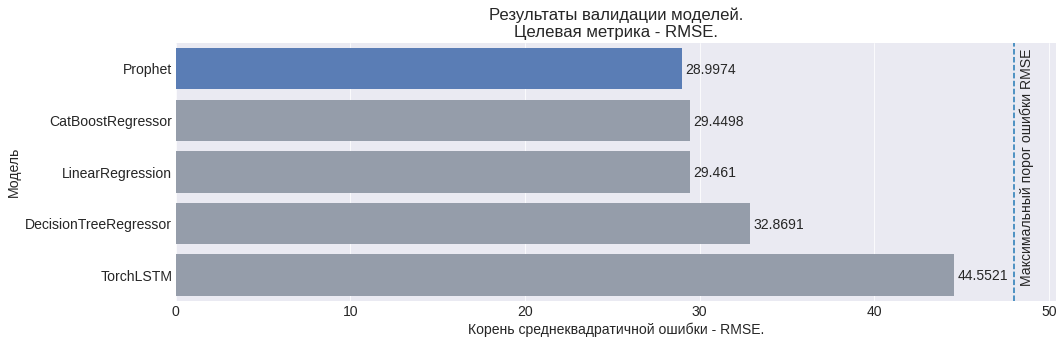

In [32]:
modeling_res = pd.DataFrame({'Модель' : [str(row[0]) for row in model_list],
                             'RMSE' : [round(row[1], 4) for row in model_list],
                             'Время обучения и предсказания (сек)' : 
                             [round(row[2], 4) for row in model_list]})

display(modeling_res
        .sort_values(by = 'RMSE')
        .style
        .set_caption('Результаты валидации моделей.')
        .set_table_styles(styles))

modeling_res = (modeling_res.sort_values(by = 'RMSE'))
palette = np.append(['#4b79c4'], 
                    ['#929cad' for _ in range(modeling_res.shape[0] - 1)])

ax = sns.barplot(modeling_res['RMSE'], modeling_res['Модель'], palette = palette)
ax.set_title('Результаты валидации моделей.\nЦелевая метрика - RMSE.')
ax.set_xlabel('Корень среднеквадратичной ошибки - RMSE.')
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_x() + p.get_width() + .2, p.get_y() + .5))
plt.axvline(48,linestyle = '--')
plt.text(48.3, 1.9, s = 'Максимальный порог ошибки RMSE', rotation = 'vertical', 
         horizontalalignment = 'left', verticalalignment = 'center')
plt.show();

## Тестирование

[К содержанию.](#tableofcontents)

---

Проверим работу лучшей модели, `Prophet`, на тестовой выборке.

07:45:19 - cmdstanpy - INFO - Chain [1] start processing
07:45:21 - cmdstanpy - INFO - Chain [1] done processing


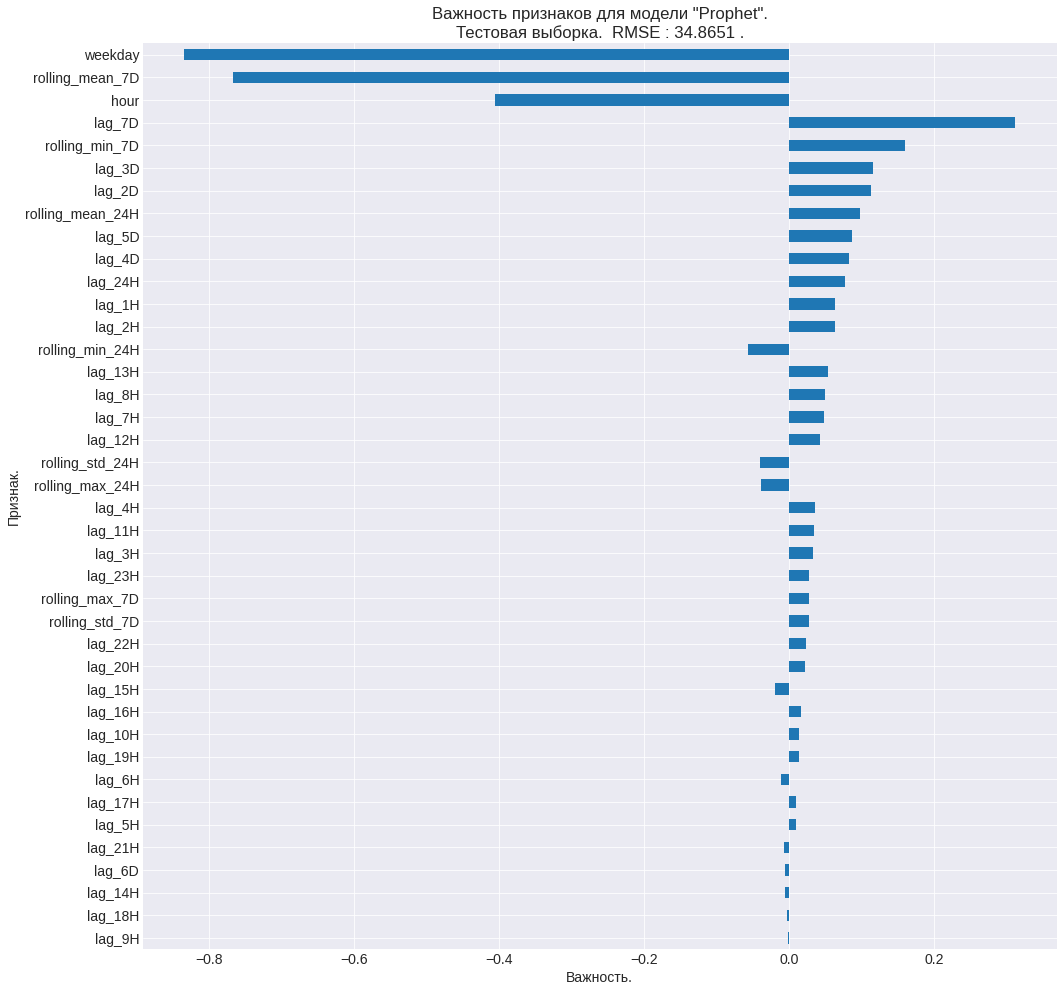

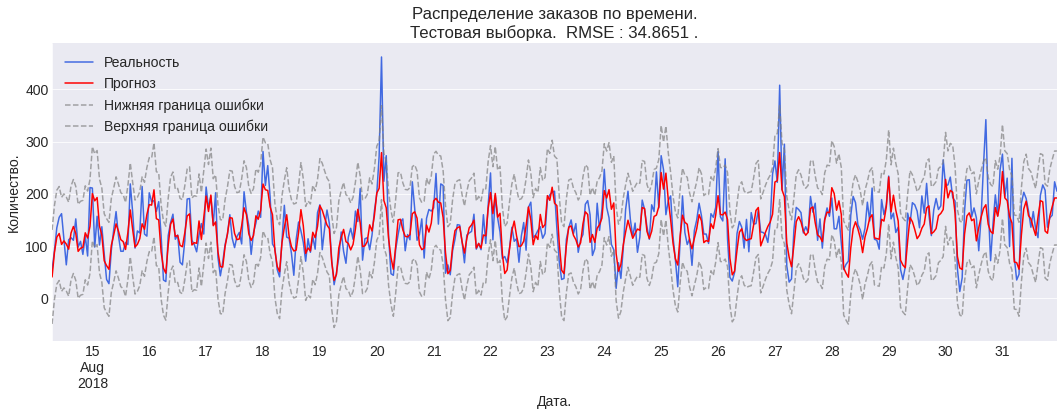

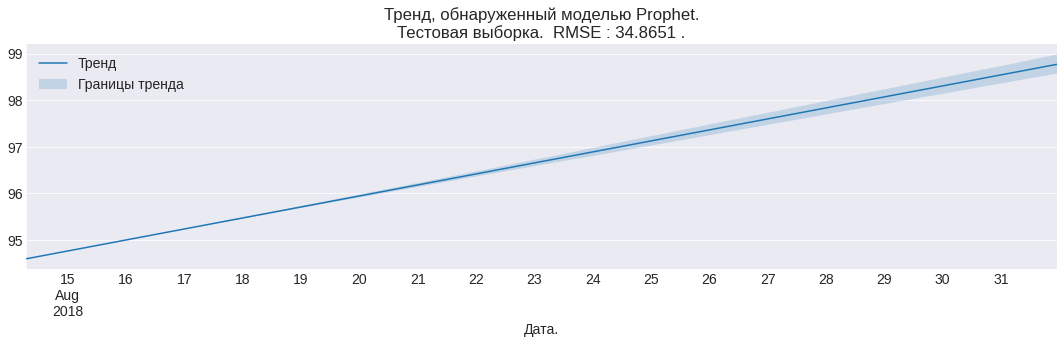

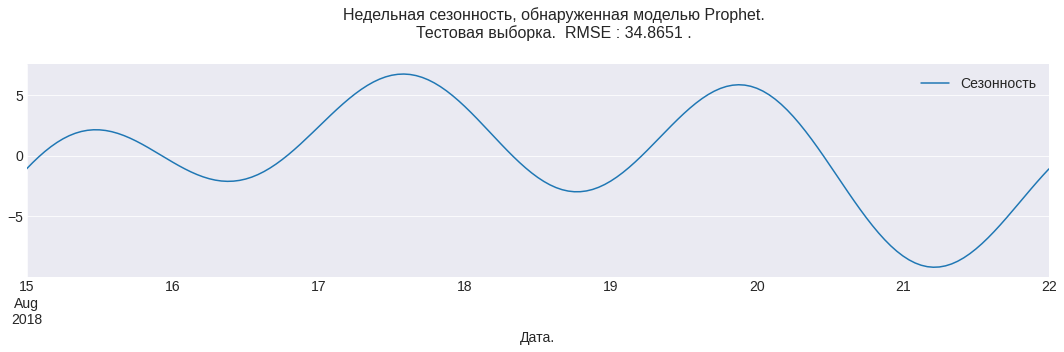

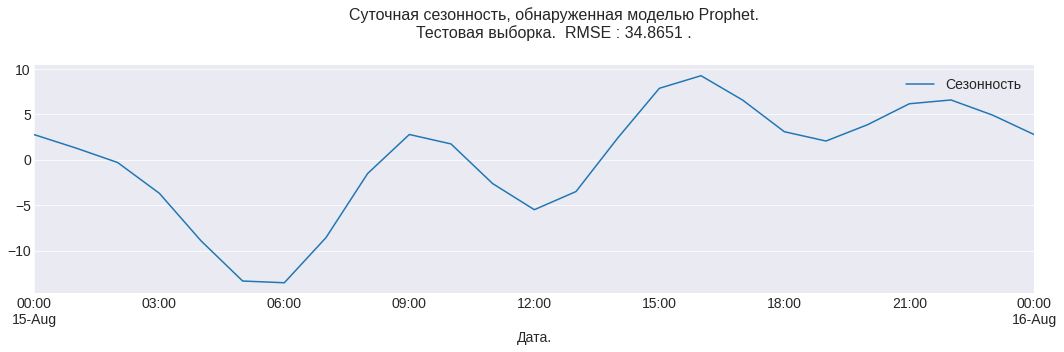

In [33]:
prophet_test_stand(train = pd.concat([train_prophet, validation_prophet]), 
                   validation = test_prophet,
                   header = 'Модель Prophet.<br>Тестовая выборка.',
                   suptitle_add = '\nТестовая выборка. ',
                   test = True)

### Оценка адекватности.

[К содержанию.](#tableofcontents)

---
Для оценки адекватности финальной модели, вычислим ошибку $RMSE$ для "наивного" прогноза, в котором все будущие значения предсказываются как предыдущие.

<a name='naive'></a>

In [34]:
# naive = df.copy()
# naive_rmse = np.sqrt(np.mean(naive.num_orders.diff() ** 2))
# print(f'\033[1m- Корень среднеквадратичной ошибки RMSE наивного '+
#       f'прогноза: {naive_rmse:.4f} .\033[0m')

In [35]:
## ВЕРСИЯ 2.
# Запишем реальность и прогноз.
truth = test_prophet.set_index('ds')['y']
preds = test_prophet.set_index('ds')['y'].shift()
preds.iloc[0] = validation_prophet.iloc[-1, 1]

# Вычислим и выведем RMSE.
naive_rmse = mean_squared_error(truth, preds, squared = False)
print(f'\033[1m- Корень среднеквадратичной ошибки RMSE наивного '+
      f'прогноза: {naive_rmse:.4f} .\033[0m')

- Корень среднеквадратичной ошибки RMSE наивного прогноза: 58.8197 .


### Тестирование. Вывод.

[К содержанию.](#tableofcontents)

---
- На тестовой выборке модель показала результат хуже, чем на валидации, но гораздо ниже заданного порога. Возможно, опдбор гиперпараметров и более точная настройка улучшит результат.
- Важность признаков не изменилась.
- Значение ошибки модели ниже ошибки "наивного" прогноза. Модель адекватна.

In [36]:
# Замерим время выполнения ноутбука.
notebook_time_total = perf_counter() - notebook_time_start
print(f'Общее время выполнения ноутбука ≈ {notebook_time_total / 60:.0f} мин.')

Общее время выполнения ноутбука ≈ 41 мин.


## Вывод.

[К содержанию.](#tableofcontents)

---

### Итог работы.
  - Была создана модель прогнозирования кол-ва заказов такси.
  - Целевая метрика лучшей модели `Prophet` на тестовой выборке в $10\%$ ниже порогового значения: $34.87$.

### Обзор работы.
- __Задача МО.__
  - Целевой признак присутствует - количественный, непрерывный.
  - Целевая метрика - корень среднеквадратичной ошибки $RMSE$, не более $48$.
  - Задача МО: обучение с учителем, построение регрессионной модели.<br><br>

- __Результаты работы.__
  - Было проведено ресемплирование данных по одному часу.
  - Был проведён анализ временного ряда и обнаружены 
    - недельная сезонность:
	  - повышенный спрос в понедельник;
      - снижение спроса во вторник с последующим восстановлением;
      - средний спрос в выходные;
	- суточная сезонность:
	  - минимум в районе $6:00$;
	  - подъем вечером и пик в районе $0:00$
	- общий тренд роста кол-в заказов такси от месяца к месяцу.
  - Были созданы дополнительные признаки:
    - календарные признаки в соответствии с обнаруженными сезонностью и трендами:
      - месяц;
      - номер недели;
      - номер дня в году;
      - номер дня в месяце;
      - номер дня в неделе;
      - бинарный признак - выходной день;
      - бинарный признак - начало месяца;
      - бинарный признак - конец месяца;
      - номер часа в сутках;
    - с отстающими значениями в интервалах $[2 ; 24]$ часов и от $2$ до $7$ дней включительно;
    - со скользящим средним, минимумом, максимумом и ст. отклонением с окном в одни сутки.
  - Для создания признаков с максимальным отставанием в $1$ неделю было удалено $24 * 7 = 168$ наблюдений из начала датафрейма, из первого месяца в данных - марта, с сохранением временной последовательности.
  - Разделения выборок проводились с заданным размером - $10\%$ и сохранением временной последовательности наблюдений. 
  - Процесс отбора признаков и перебора гиперпараметров для основных алгоритмов был автоматизирован.
  - Были протестированы на _валидационной выборке_ следующие модели:
    - Линейная регрессия.
	  - Значение $RMSE$ ниже порогового.
	  - Было отобрано $12$ не мультиколлинеарных признаков.
	  - 3 наиболее важных признака:
	    - `hour_5`;
		- `weekday_1`, `weekday_4`;
		- `lag_7D`.
	- Дерево решений.
	  - Значение $RMSE$ ниже порогового.
      - Было отобрано $6$ признаков, самыми важными из которых являются:
        - `lag_..D`: признаки, отображающие недельную сезонность.
        - `hour`.
	- Градиентный бустинг.
	  - Значение $RMSE$ ниже порогового.
	  - Было отобрано $20$ признаков.
	  - 3 наиболее важных признака:
	    - `lag_7D`;
		- `hour`;
		- `lag_24H`.
	- Алгоритм прогнозирования `Prophet`.
	  - Значение $RMSE$ ниже порогового.
      - Модель хорошо работает "из коробки".
	 - 3 наиболее важных категории признаков:
	   - `month`, `is_month_end`, `is_month_start`;
	   - `is_weekend`;
	   - `rolling_mean_7D`.
	- Рекуррентная нейронная сеть `LSTM` реализации `PyTorch`.
	   - Модель показала значение $RMSE$ едва ниже порогового. Модель требует доработки.
	  - В отличие от других моделей, особенно `Prophet`, модель требует точной настройки и большего времени на обучение.
	 
	


- __Рекомендации.__
 Рекомендуем заказчику включение анализа праздников и выделяющихся дат, если они входят в прогнозируемый период.<br><br>

- __Исходные данные. Общая информация.__
  - Данные представлены $26496$ наблюдениями и двумя признаками, один из которых - дата-время `datetime` - преобразован в индекс датафрейма, а второй - кол-во заказов `num_orders` - является целевым.
    - Данные содержат наблюдения за $6$ месяцев.
    - Периодичность наблюдений - $10 мин.$
    - Начало наблюдений: $00:00$ $1$ марта $2018$.
    - Конец наблюдений: $23:50$ $31$ августа $2018$.
    - Кол-во наблюдений распределено по месяцам равномерно с учётом кол-в дней в месяцах
  - Пропусков и дубликатов в данных не обнаружено.
  - В данных присутствуют выбросы: $ \approx 1\%$ высоких значений кол-в заказов более $43$.
  - Временной ряд является монотонным: возрастающим.
  - Временной ряд является одномерным, интегрированным.<br>
    - Т.к. тест `adfuller` показал стационарность, а тест `kpss` - нестационарность, временной ряд разностно-стационарен или интегрирован.
    - Необходимо взятие разности временного ряда для анализа (частичной) авторегрессии.
  - Данные распределены ненормально, что является дополнительным индикатором нестационарности временного ряда.

- __Результат ресемплинга.__
  - Периодичность наблюдений успешно изменена и составляет $1$ час.
  - Наблюдения равномерно распределены по месяцам с учётом кол-ва дней в месяце.
  - Данные представлены $4416$ наблюдениями и двумя признаками, один из которых - дата `datetime` - индекс датафрейма, а второй - кол-во заказов `num_orders` - является целевым.
  - Пропусков и дубликатов в данных не обнаружено.
  - Временной ряд является одномерным, интегрированным.<br>
  - Целевой признак распределен приближенно нормально. Распределение имеет положительную асимметрию и выбросы: $ \approx 1\%$ высоких значений кол-в заказов более $223$.<br>